# Problem Statement

The company wants to understand and process the data coming out of data engineering pipelines:
1. Clean, sanitize and manipulate data to get useful features out of raw fields.
2. Make sense out of the raw data and help the data science team to build forecasting models on it.

# Setting up environment

In [1]:
# importing important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_ind_from_stats,ttest_1samp,levene,shapiro,t,f_oneway,f,chi2_contingency,chi2,ttest_rel,kruskal,normaltest,anderson,spearmanr,boxcox,probplot

!python -m wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

In [2]:
df = pd.read_csv('delhivery_data.csv')

In [3]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# EDA-1

In [4]:
# shape of data
print('Total number of rows:',df.shape[0])
print('Total number of columns:',df.shape[1])

Total number of rows: 144867
Total number of columns: 24


In [5]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
# data type correction for date time columns
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time']) 
df['od_start_time'] = pd.to_datetime(df['od_start_time']) 
df['od_end_time'] = pd.to_datetime(df['od_end_time']) 
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp']) 

In [7]:
# data type conversion to category
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [8]:
# statistical summary of numerical data
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [9]:
# statistical summary of categorical data
df.describe(include='category')

,data,route_type
count,144867,144867
unique,2,2
top,training,FTL
freq,104858,99660


In [10]:
# statistical summary of Time data
df.describe(include='datetime')

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867
unique,14817,26369,26369,93180
top,2018-09-28 05:23:15.359220,2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,101,81,81,40
first,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,2018-09-12 00:02:09.740725
last,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2018-10-06 23:44:12


In [11]:
# check for null values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [12]:
# checking for duplicated values
df.duplicated().sum()

0

**Observations:**
* Data has no duplicate values.
* data has 144867 rows and 24 columns.
* for same trip_uuid step wise rows are available which wil be aggregated to create the whole picture
* around 293 source and 261 destination info is missing.
* missing values can be treated better after aggregation
* there 2 category data types (data and route_type) 


# Data Cleaning
# Merging of rows and aggregation of fields

In [13]:
# 1st aggregation
# grouping the data based on trip_uuid,destination and source
process1 = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan':'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
    }

df1 = df.groupby(['trip_uuid','source_center','destination_center']).agg(process1).reset_index()

In [14]:
# sorting the data based on time stamps to keep it in the order
df1.sort_values(by = ['trip_uuid','od_start_time'],inplace = True,ignore_index=True)

In [15]:
# 2nd aggregation
# aggregating to the level of unique trip_id
process2 = {
    'source_center':'first',
    'destination_center':'first',
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan':'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
    }

df2 = df1.groupby(['trip_uuid']).agg(process2).reset_index()
df2

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,IND583101AAA,IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND140603AAA,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,trip-153861106442901555,IND209304AAA,IND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14815,trip-153861115439069069,IND627005AAA,IND628801AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,347.0,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [16]:
# checking for the null values in the final data
df2.isna().sum()

trip_uuid                          0
source_center                      0
destination_center                 0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_name                       10
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_distance              0
segment_osrm_time                  0
dtype: int64

**observations:**
* after aggregation we have only 10 null value in source and 8 in destination data.
* there are no duplicated values.
* after aggregation we are left with 14817 unique trip_uuids

# Missing Value Treatment

In [17]:
# dropping the null values from the data set
df2.dropna(how='any',inplace = True)

In [18]:
# data information post merging the data and treating null values
# shape of data
print('Total number of rows:',df2.shape[0])
print('Total number of columns:',df2.shape[1])

Total number of rows: 14800
Total number of columns: 19


# Feature Creation

## creating feature from source and destination data

In [19]:
# creating function for feature extraction from the source and destination data
def place(x):
    return x.split('_')[0]
def state(x):
    return x.split('_')[-1]
def place1(x):
    return x.split('_')[1]

In [20]:
df2['source_name'] = df2['source_name'].str.replace('\s\(','_')
df2['source_name'] = df2['source_name'].str.replace('\)','')
df2['destination_name'] = df2['destination_name'].str.replace('\s\(','_')
df2['destination_name'] = df2['destination_name'].str.replace('\)','')
df2['source_city'] = df2['source_name'].apply(lambda x: place(x))
df2['source_state'] = df2['source_name'].apply(lambda x: state(x))
df2['source_place'] = df2['source_name'].apply(lambda x: place1(x))
df2['destination_city'] = df2['destination_name'].apply(lambda x: place(x))
df2['destination_state'] = df2['destination_name'].apply(lambda x: state(x))
df2['destination_place'] = df2['destination_name'].apply(lambda x: place1(x))

In [21]:
df2.iloc[:,-6:]

,source_city,source_state,source_place,destination_city,destination_state,destination_place
0,Bhopal,Madhya Pradesh,Trnsport,Gurgaon,Haryana,Bilaspur
1,Tumkur,Karnataka,Veersagr,Chikblapur,Karnataka,ShntiSgr
2,Bangalore,Karnataka,Nelmngla,Chandigarh,Punjab,Mehmdpur
3,Mumbai Hub,Maharashtra,Maharashtra,Mumbai,Maharashtra,MiraRd
4,Bellary,Karnataka,Dc,Bellary,Karnataka,Dc
...,...,...,...,...,...,...
14812,Chandigarh,Punjab,Mehmdpur,Chandigarh,Punjab,Mehmdpur
14813,FBD,Haryana,Balabhgarh,Faridabad,Haryana,Blbgarh
14814,Kanpur,Uttar Pradesh,Central,Kanpur,Uttar Pradesh,Central
14815,Tirunelveli,Tamil Nadu,VdkkuSrt,Tirunelveli,Tamil Nadu,VdkkuSrt


In [22]:
# calculating time difference between od_end_time and od_start_time
df2['time_diff'] = (df2['od_end_time']-df2['od_start_time'])/np.timedelta64(1,'m')
df2.iloc[:,-1:]

,time_diff
0,2260.109800
1,181.611874
2,3934.362520
3,100.494935
4,718.349042
...,...
14812,405.485842
14813,60.590521
14814,422.119867
14815,348.512862


In [23]:
# extracting data from timestamps to 
df2['day'] = df2['trip_creation_time'].dt.day
df2['month'] = df2['trip_creation_time'].dt.month
df2['year'] = df2['trip_creation_time'].dt.year
df2['time_of_day'] = df2['trip_creation_time'].dt.time

In [24]:
df2.iloc[:,-4:].head()

,day,month,year,time_of_day
0,12,9,2018,00:00:16.535741
1,12,9,2018,00:00:22.886430
2,12,9,2018,00:00:33.691250
3,12,9,2018,00:01:00.113710
4,12,9,2018,00:02:09.740725


**Observations:**
* city, place and state are extracted from location data.
* day, month, year and time of day is extracted from timestamp when the trip was created.

# Dropping columns which will not be used

In [25]:
df2.drop(columns=['route_schedule_uuid',
                  'source_center',
                  'destination_center',
                  'source_name',
                  'destination_name',
                  'od_start_time',
                  'od_end_time'],
         inplace = True)

In [26]:
# data information post deleting the unused columns
# shape of data
print('Total number of rows:',df2.shape[0])
print('Total number of columns:',df2.shape[1])

Total number of rows: 14800
Total number of columns: 23


In [27]:
df2.describe(include=["object"])

,trip_uuid,source_city,source_state,source_place,destination_city,destination_state,destination_place,time_of_day
count,14800,14800,14800,14800,14800,14800,14800,14800
unique,14800,672,29,652,766,32,736,14800
top,trip-153671041653548748,Gurgaon,Maharashtra,Central,Bengaluru,Maharashtra,Central,00:00:16.535741
freq,1,1022,2682,1039,1056,2591,921,1


# Unique data analysis

In [28]:
df2.groupby('data')['trip_uuid'].nunique().to_frame().T

data,test,training
trip_uuid,4153,10647


In [29]:
df2.groupby('route_type')['trip_uuid'].nunique().to_frame().T

route_type,Carting,FTL
trip_uuid,8906,5894


In [30]:
df2.groupby('month')['trip_uuid'].nunique().to_frame().T

month,9,10
trip_uuid,13020,1780


**Observations:**
1. 60% of the order delivered through carting and for rest of the Full truck load (FTL) is preferred.
2. Dataset is of two months only that is September and October.

## Busy corridors (based on number of trip ids)

In [31]:
# top 10 states 
display(df2.groupby('source_state')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(10))
display(df2.groupby('destination_state')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(10))

,trip_uuid
source_state,
Maharashtra,2682
Karnataka,2229
Haryana,1681
Tamil Nadu,1085
Delhi,791
Telangana,779
Gujarat,746
Uttar Pradesh,720
West Bengal,677


,trip_uuid
destination_state,
Maharashtra,2591
Karnataka,2275
Haryana,1667
Tamil Nadu,1072
Telangana,838
Gujarat,746
Uttar Pradesh,732
West Bengal,708
Punjab,693


In [32]:
# top 10 cities
display(df2.groupby('source_city')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(10))
display(df2.groupby('destination_city')['trip_uuid'].nunique().sort_values(ascending=False).to_frame().head(10))

,trip_uuid
source_city,
Gurgaon,1022
Bengaluru,1015
Bhiwandi,811
Bangalore,755
Delhi,618
Mumbai,579
Hyderabad,562
Pune,445
Chandigarh,418


,trip_uuid
destination_city,
Bengaluru,1056
Mumbai,891
Gurgaon,869
Bangalore,646
Hyderabad,630
Bhiwandi,604
Delhi,576
Chandigarh,463
Chennai,388


In [33]:
df2.groupby(['source_city','destination_city']).agg({'trip_uuid':'count'}).sort_values(by = ['trip_uuid'],ascending=False).head(10)

,,trip_uuid
source_city,destination_city,
Bengaluru,Bengaluru,549
Bangalore,Bengaluru,455
Hyderabad,Hyderabad,398
Bhiwandi,Mumbai,332
Bengaluru,Bangalore,326
Mumbai,Mumbai,264
Chandigarh,Chandigarh,250
Gurgaon,Delhi,240
Mumbai Hub,Mumbai,227


In [34]:
df2.groupby(['source_state','destination_state']).agg({'trip_uuid':'count'}).sort_values(by = ['trip_uuid'],ascending=False).head(10)

,,trip_uuid
source_state,destination_state,
Maharashtra,Maharashtra,2406
Karnataka,Karnataka,2015
Tamil Nadu,Tamil Nadu,1016
Haryana,Haryana,871
Telangana,Telangana,655
Gujarat,Gujarat,624
West Bengal,West Bengal,610
Uttar Pradesh,Uttar Pradesh,545
Punjab,Punjab,491


**Observations:**
* most number of orders are booked and recieved in Maharashtra.
* maharashtra, karnataka and haryana are the top 3 busy states.
* bengalore and Gurugram are the two most busiest cities.
* a lot of orders are moving in the same city.

# Visual Analysis

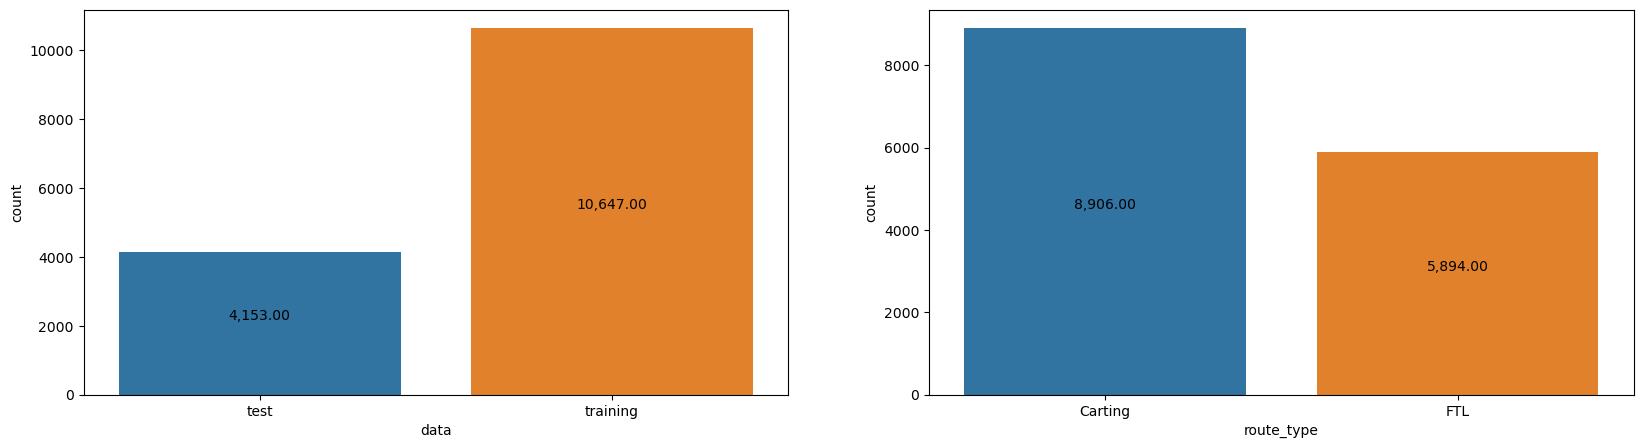

In [35]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax = sns.countplot(df2['data'])
for p in ax.patches:
  ax.annotate("{:,.2f}".format(p.get_height()), 
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.subplot(1, 2, 2)
ax = sns.countplot(df2['route_type'])
for p in ax.patches:
  ax.annotate("{:,.2f}".format(p.get_height()), 
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')

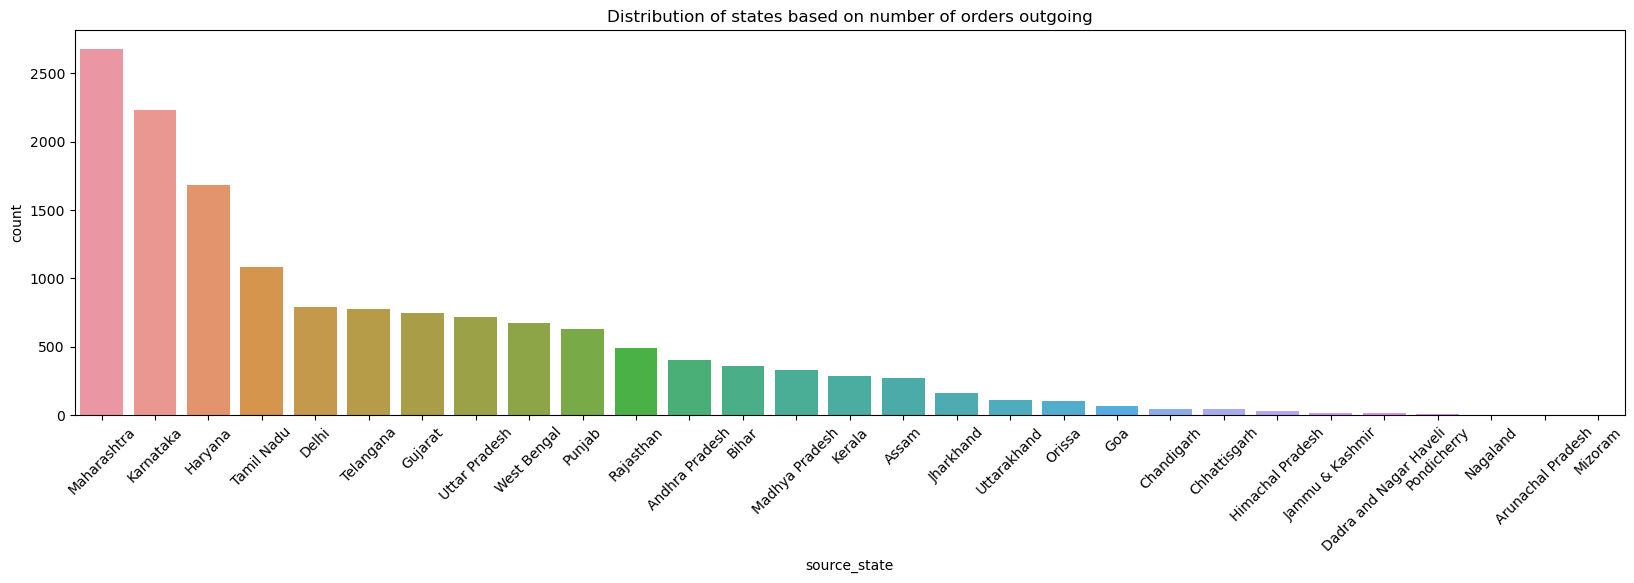

In [36]:
fig = plt.figure(figsize=(20,5))
sns.countplot(df2['source_state'], order = df2['source_state'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Distribution of states based on number of orders outgoing')
plt.show()

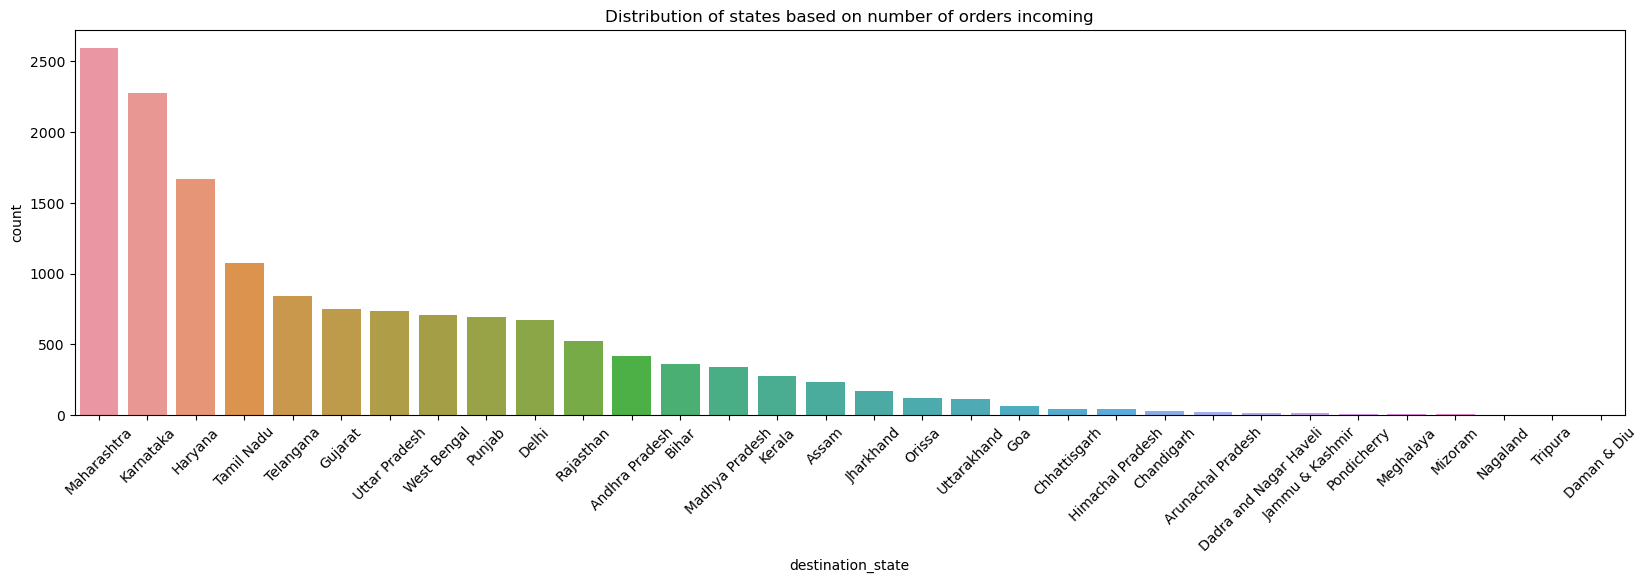

In [37]:
fig = plt.figure(figsize=(20,5))
sns.countplot(df2['destination_state'], order = df2['destination_state'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Distribution of states based on number of orders incoming')
plt.show()

**Observations**
1. Top 5 source states are Maharashtra,Karnataka,Haryana TamilNadu and Delhi.
2. Source States with less than 10 orders are Nagaland, Mizoram, and Arunachal Pradesh.
3. Top 5 source cities are Gurgaon, Bengaluru ,Mumbai, Bhiwandi and Bangalore
4. Top 5 destination states are Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
5. Destination states with less than 10 orders are Meghalaya, Mizoram Daman & Diu, Nagaland, and Tripura
6. Top 5 destination cities are Mumbai, Bengaluru, Gurgaon, Bangalore and Hyderabad.

## Histplot for continuous variables

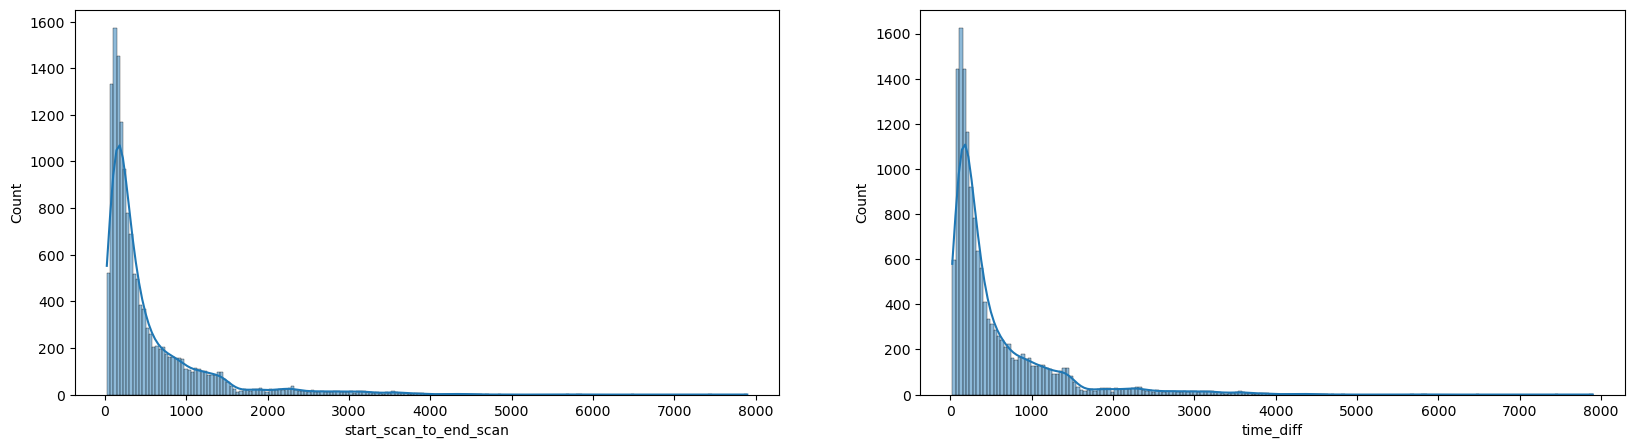

In [38]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(df2['start_scan_to_end_scan'],kde = True)
plt.subplot(1,2, 2)
sns.histplot(df2['time_diff'],kde = True)
plt.show()

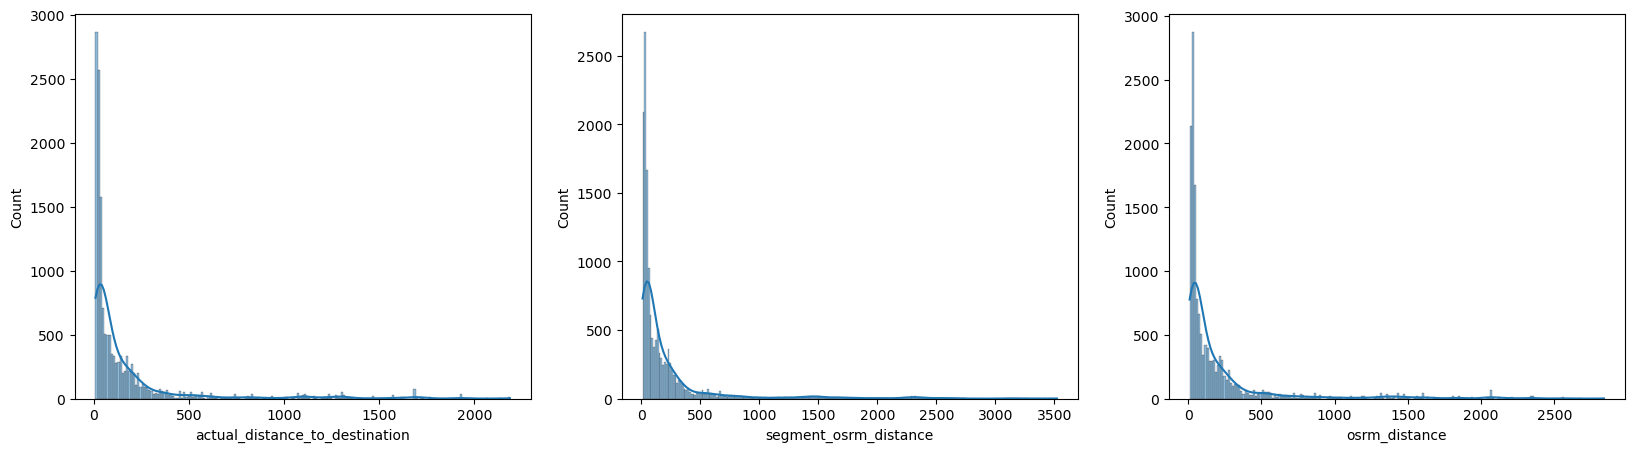

In [39]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.histplot(df2['actual_distance_to_destination'],kde = True)
plt.subplot(1, 3, 2)
sns.histplot(df2['segment_osrm_distance'],kde = True)
plt.subplot(1, 3, 3)
sns.histplot(df2['osrm_distance'],kde = True)
plt.show()

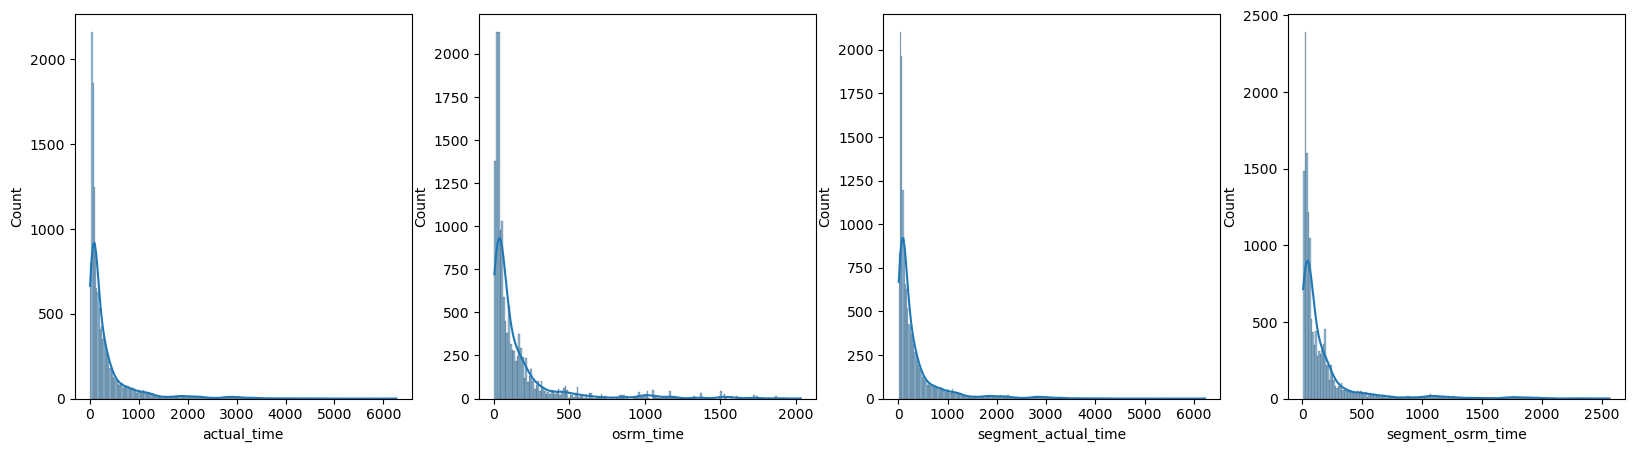

In [40]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.histplot(df2['actual_time'],kde = True)
plt.subplot(1, 4, 2)
sns.histplot(df2['osrm_time'],kde = True)
plt.subplot(1, 4, 3)
sns.histplot(df2['segment_actual_time'],kde = True)
plt.subplot(1, 4, 4)
sns.histplot(df2['segment_osrm_time'],kde = True)
plt.show()

**Observations:**
* all of the numerical data is right skewed.

# Outlier Detection and treatment

<AxesSubplot:ylabel='time_diff'>

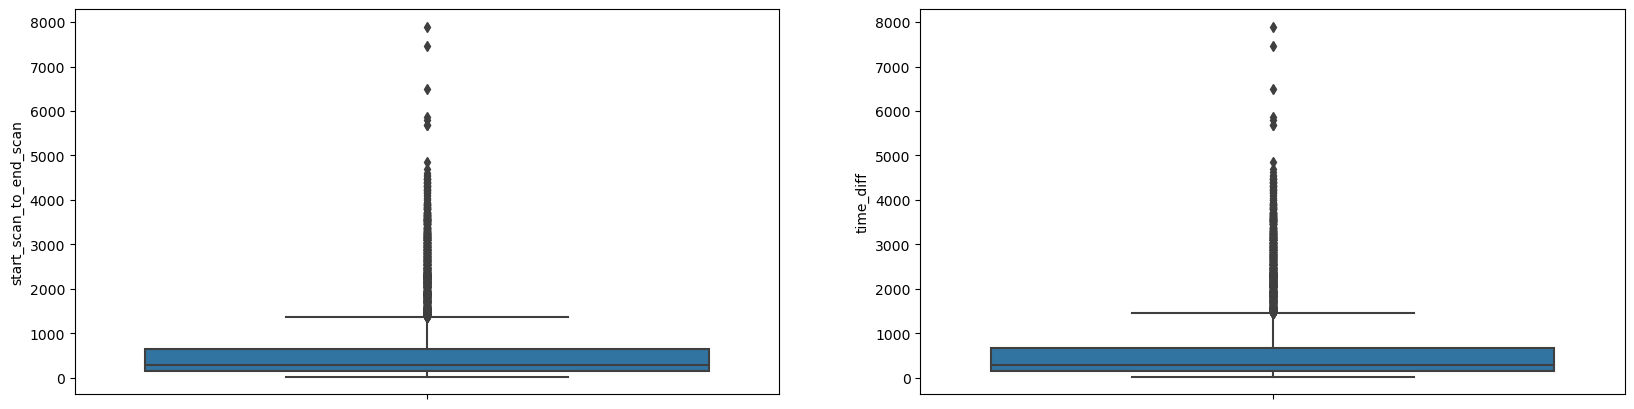

In [41]:
# outliers in time difference data
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df2['start_scan_to_end_scan'])
plt.subplot(1,2, 2)
sns.boxplot(y = df2['time_diff'])

<AxesSubplot:ylabel='segment_osrm_distance'>

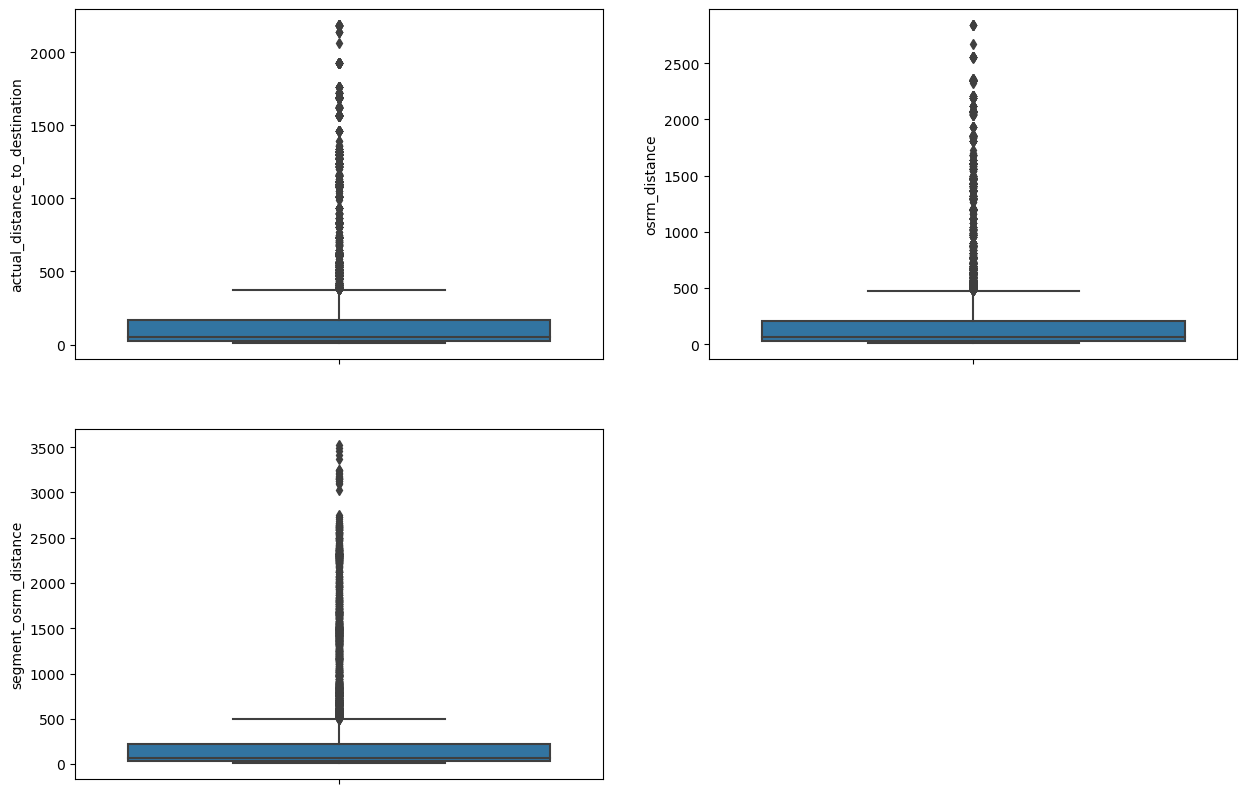

In [42]:
# outliers in distance data
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.boxplot(y = df2['actual_distance_to_destination'])
plt.subplot(2,2, 2)
sns.boxplot(y = df2['osrm_distance'])
plt.subplot(2,2, 3)
sns.boxplot(y = df2['segment_osrm_distance'])

<AxesSubplot:ylabel='segment_osrm_time'>

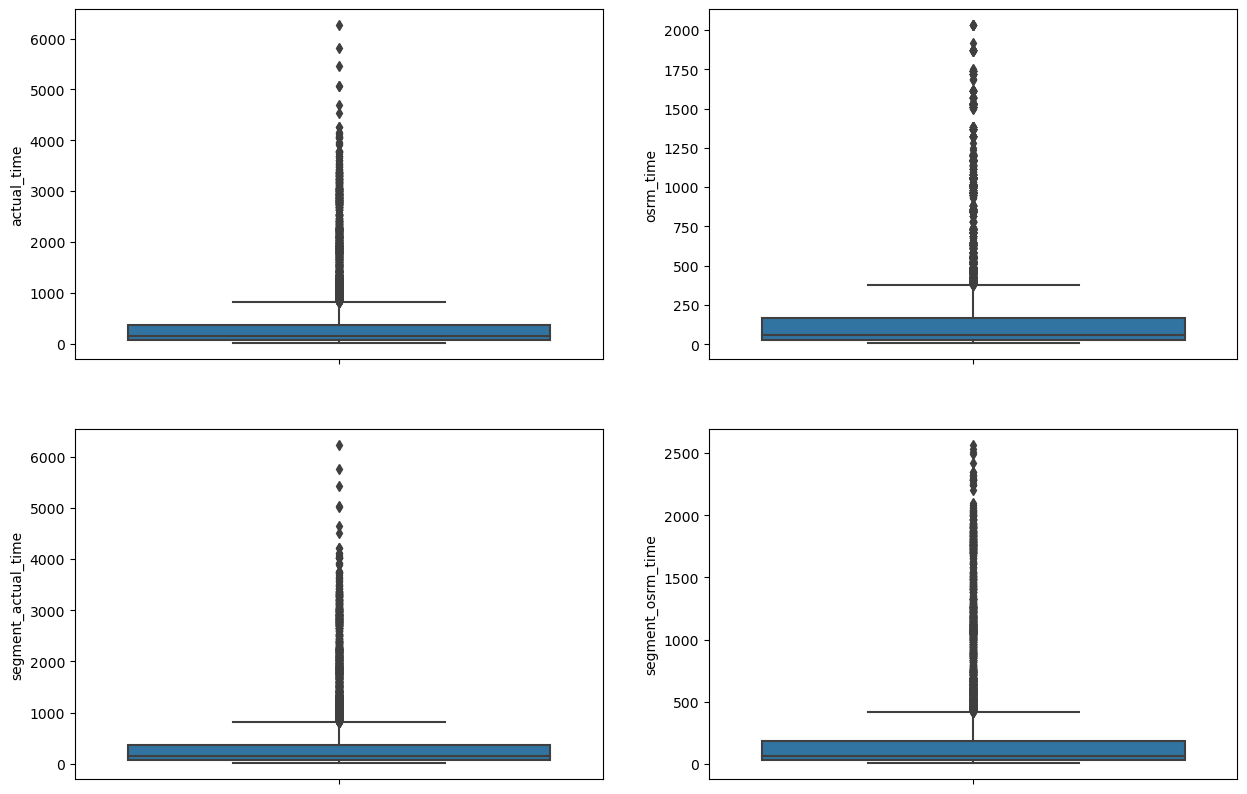

In [43]:
# outliers in time data
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.boxplot(y = df2['actual_time'])
plt.subplot(2,2, 2)
sns.boxplot(y = df2['osrm_time'])
plt.subplot(2,2, 3)
sns.boxplot(y = df2['segment_actual_time'])
plt.subplot(2,2, 4)
sns.boxplot(y = df2['segment_osrm_time'])

**Observations**
* all data of time and distance have high number of outliers, it was evident from right skewness of the data.

## Outlier Treatment using IQR method

In [44]:
# copying the data to keep the original safe
df_out = df2.copy()

In [45]:
# removing outliers from the data
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_distance', 'segment_osrm_time','time_diff']
for x in numerical_columns:
    Q25 = df_out[x].quantile(0.25)
    Q75 = df_out[x].quantile(0.75)
    IQR = Q75-Q25
    upper_limit = Q75 + 1.5*IQR
    lower_limit = Q25 - 1.5*IQR
    df_out = df_out[(df_out[x] > Q25 - 1.5*IQR) & (df_out[x] < Q75 + 1.5*IQR)]
    

In [46]:
# data information post merging the data and treating null values
# shape of data
print('Total number of rows:',df_out.shape[0])
print('Total number of columns:',df_out.shape[1])

Total number of rows: 8968
Total number of columns: 23


# Distribution of numerical data after removing outliers

<AxesSubplot:ylabel='time_diff'>

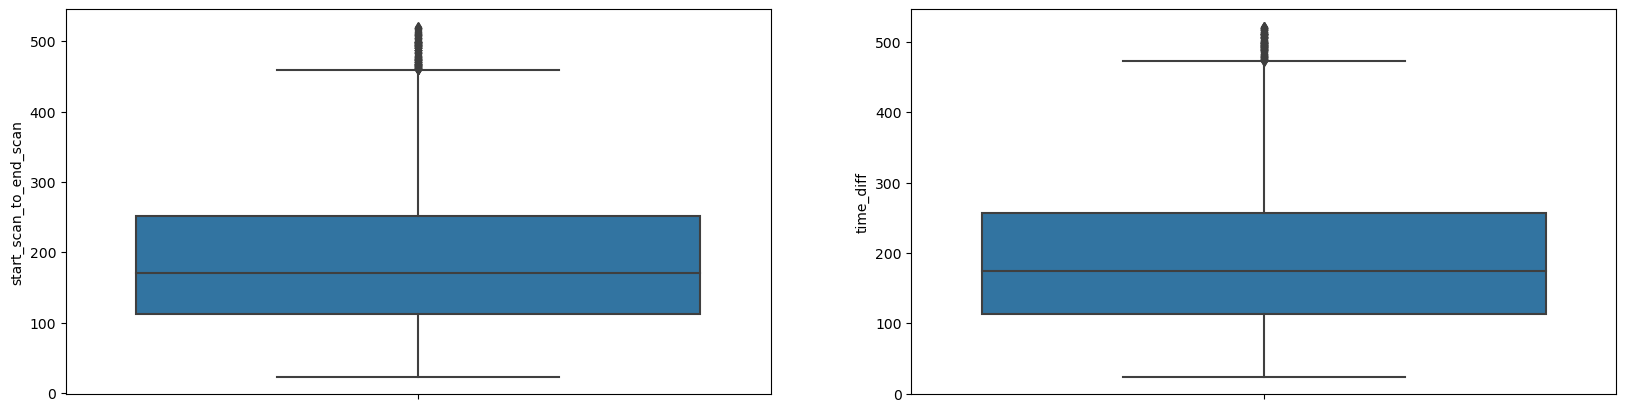

In [47]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.boxplot(y = df_out['start_scan_to_end_scan'])
plt.subplot(1,2, 2)
sns.boxplot(y = df_out['time_diff'])

<AxesSubplot:ylabel='segment_osrm_distance'>

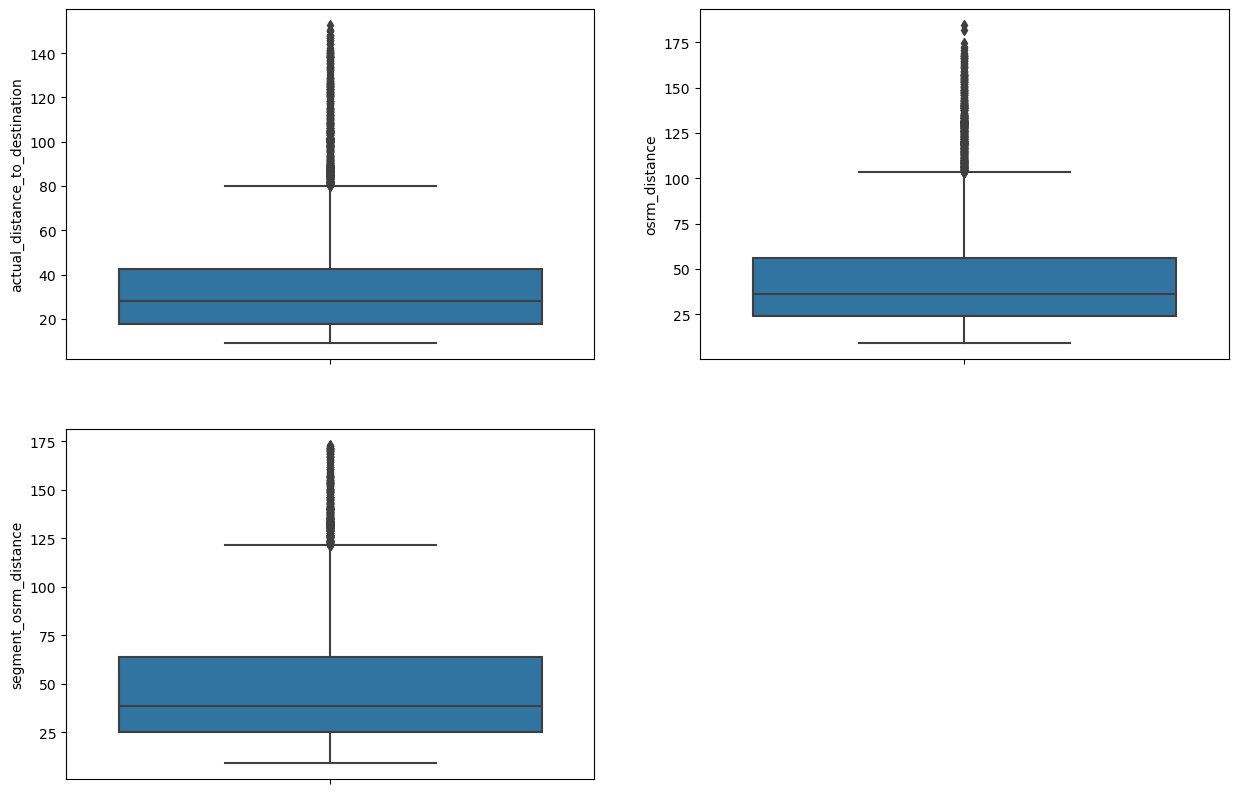

In [48]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.boxplot(y = df_out['actual_distance_to_destination'])
plt.subplot(2,2, 2)
sns.boxplot(y = df_out['osrm_distance'])
plt.subplot(2,2, 3)
sns.boxplot(y = df_out['segment_osrm_distance'])

<AxesSubplot:ylabel='segment_osrm_time'>

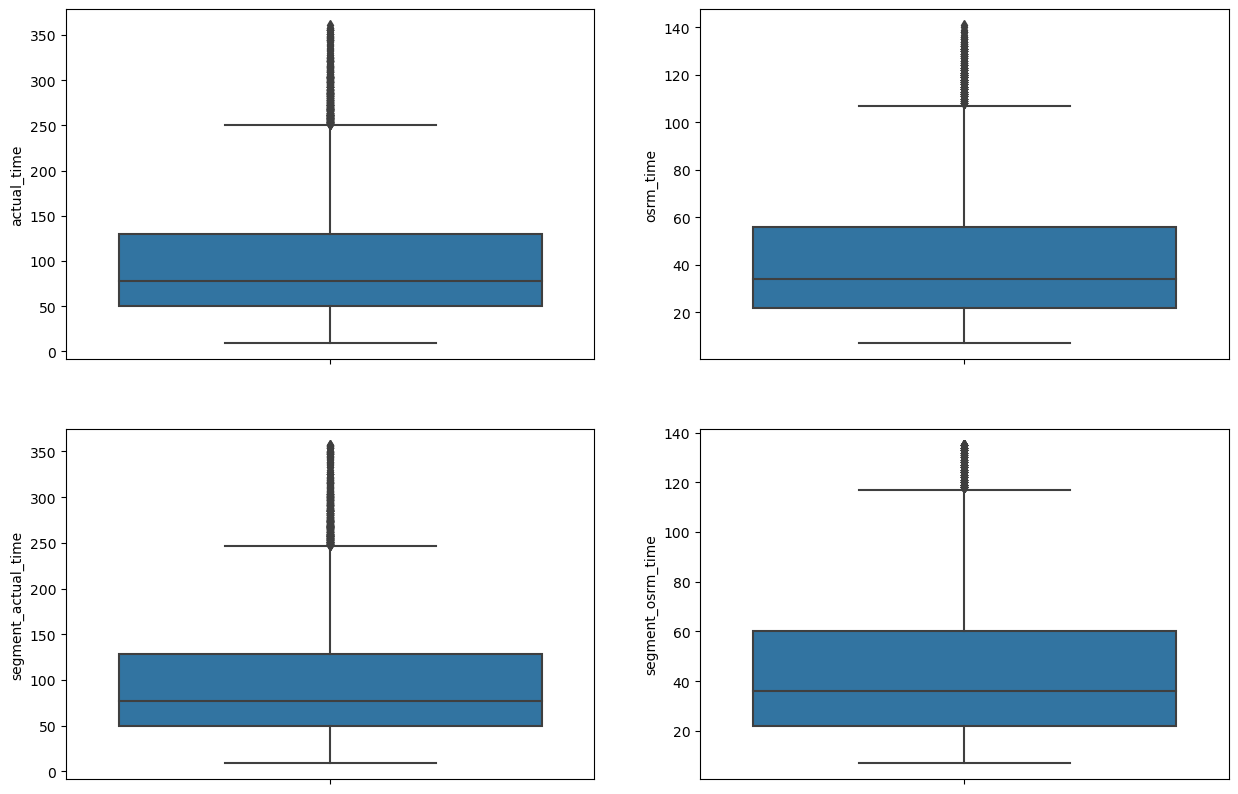

In [49]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.boxplot(y = df_out['actual_time'])
plt.subplot(2,2, 2)
sns.boxplot(y = df_out['osrm_time'])
plt.subplot(2,2, 3)
sns.boxplot(y = df_out['segment_actual_time'])
plt.subplot(2,2, 4)
sns.boxplot(y = df_out['segment_osrm_time'])

# Hypothesis Testing

# Test1: Compare the difference between time diff and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [50]:
# Data Extraction for the analysis 
start_scan_to_end_scan = df_out['start_scan_to_end_scan'] 
diff = df_out['time_diff'] # data of timestamp difference

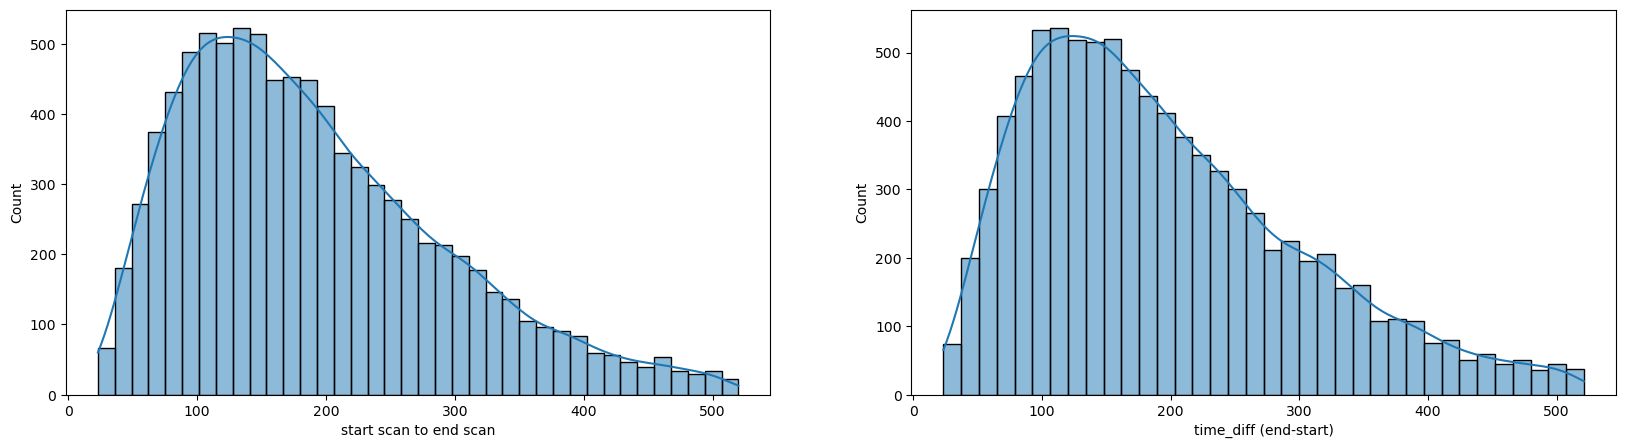

In [51]:
# checking the data distribution using histograms
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(start_scan_to_end_scan,kde = True)
plt.xlabel('start scan to end scan',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(diff,kde = True)
plt.xlabel('time_diff (end-start)',fontsize=10)
plt.show()

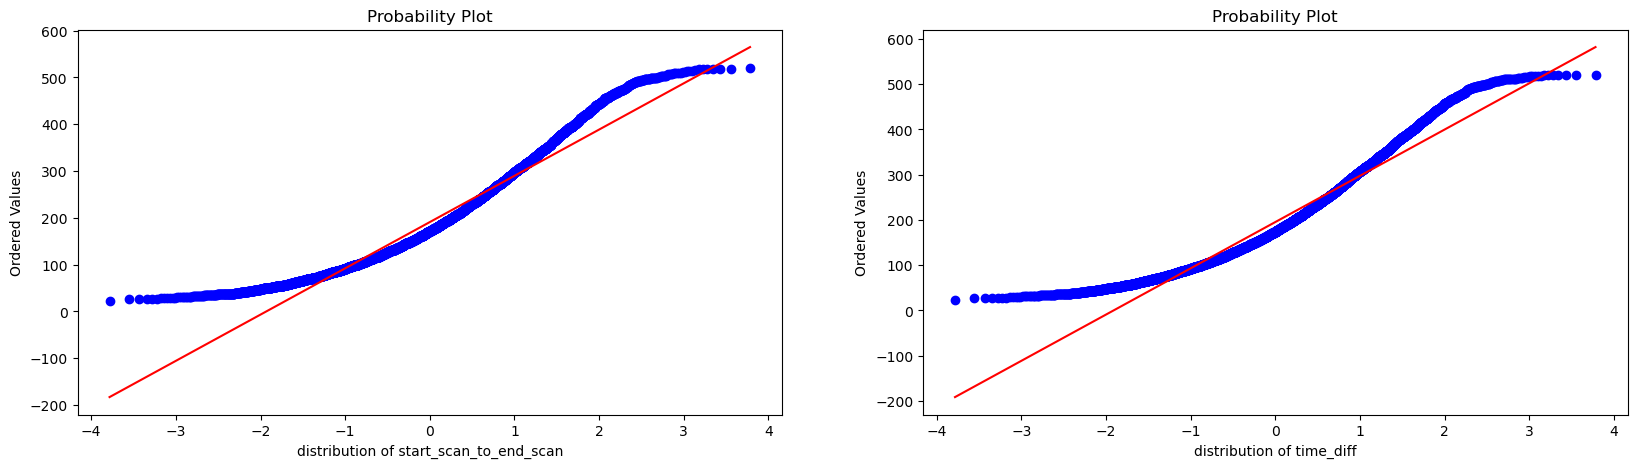

In [52]:
# Validation of Assumption 1 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
stats.probplot(start_scan_to_end_scan,dist="norm",plot=plt)
plt.xlabel('distribution of start_scan_to_end_scan',fontsize=10)
plt.subplot(1, 2, 2)
stats.probplot(diff,dist="norm",plot=plt)
plt.xlabel('distribution of time_diff',fontsize=10)
plt.show()

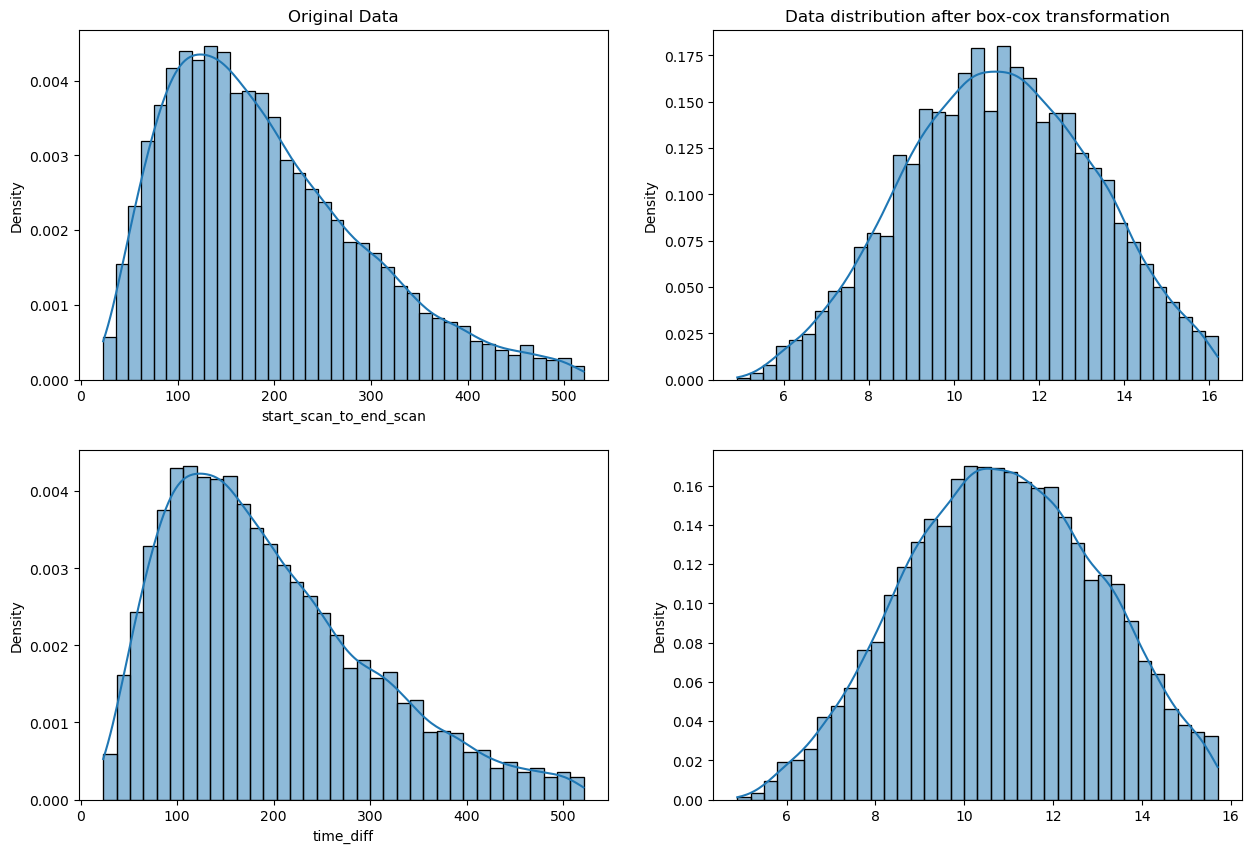

In [53]:
# Transforming data by using boxcox transformation:
original_data1=start_scan_to_end_scan
original_data2=diff


fitted_data1, fitted_lambda1 = stats.boxcox(start_scan_to_end_scan)
fitted_data2, fitted_lambda2 = stats.boxcox(diff)


fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.title('Original Data')
plt.subplot(2, 2, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
plt.title('Data distribution after box-cox transformation')

plt.subplot(2, 2, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(2, 2, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
plt.show()

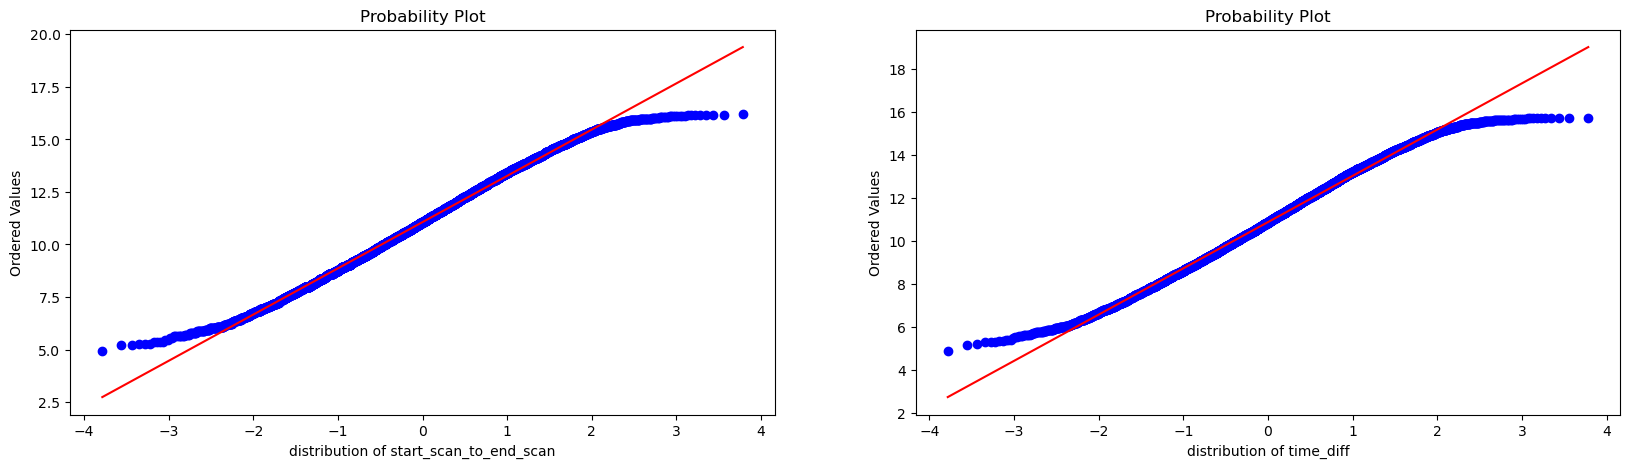

In [54]:
# Quantile-Quantile Plot post data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
stats.probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of start_scan_to_end_scan',fontsize=10)
plt.subplot(1, 2, 2)
stats.probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of time_diff',fontsize=10)
plt.show()

In [55]:
#  Validation of variance assumption: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(start_scan_to_end_scan, diff)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.0025573994985197534
Reject Null Hypothesis: Variance of the input datasets is not same


**Observations on the assumption:**
1. with confidence level 0.05 both data sets have statistically different variance.
2. after outlier removal the data is slightly right skewed which is converted to normal using box_cox transformation.

**Hypothesis setup for ttest:**
1. **Null Hypothesis:** mean of both samples are equal.
2. **Alternate:** mean of both samples is different.

In [56]:
print('start_scan_to_end_scan Mean:', start_scan_to_end_scan.mean())
print('diff Mean:', diff.mean())

start_scan_to_end_scan Mean: 190.7164362176628
diff Mean: 194.9273568628434


In [57]:
# Paired Student’s t-test
t_stat,p_value=ttest_ind(start_scan_to_end_scan,diff)
alpha = 0.05
print("Alpha:",alpha)
print("p value:",p_value)
print("t statistics:",t_stat)
if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are different")
else:
    print('Accept Null Hypothesis: The means of the samples are equal')

Alpha: 0.05
p value: 0.006411717541824584
t statistics: -2.726268007838676
Reject Null Hypothesis: The means of the samples are different


In [58]:
# correlation tets
print('pearson correlation coefficient:', stats.pearsonr(start_scan_to_end_scan,diff)[0])

pearson correlation coefficient: 0.9824981004420749


**Observations:**
1. both data have statistically different mean value (p_val = 0.006)
2. but both the data are very highly correlated (cc = 0.98)

## Test-2: Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

In [59]:
actual_agg = df_out['actual_time']
osrm_agg = df_out['osrm_time']

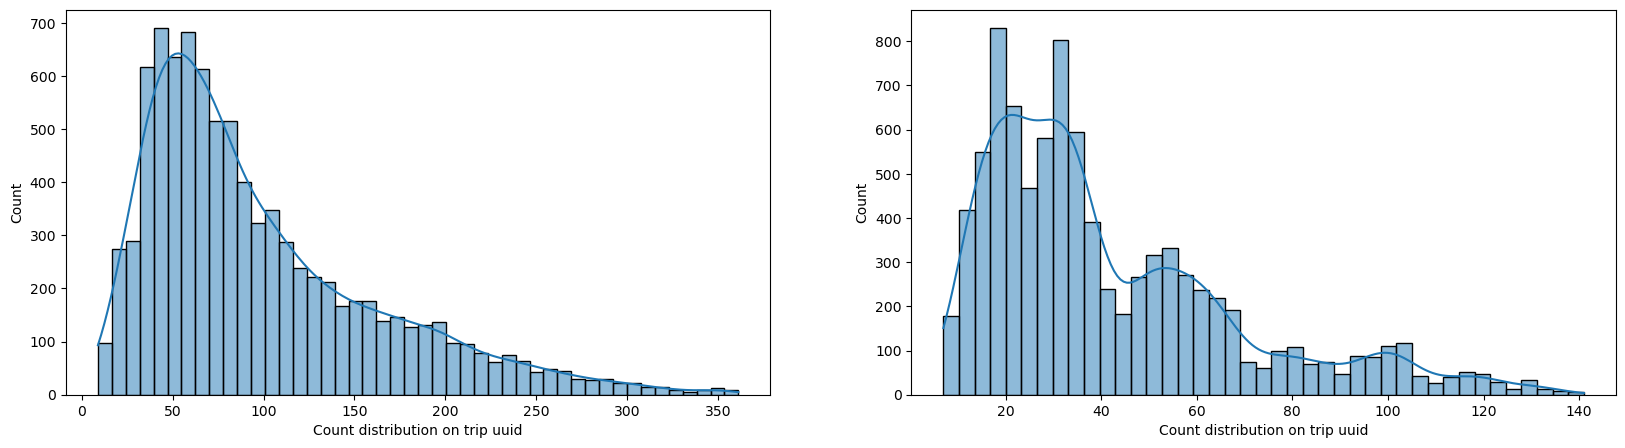

In [60]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(actual_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(osrm_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under  t-test:**

* Observations in each sample are normally distributed.
* Observations in each sample have close to same variance.


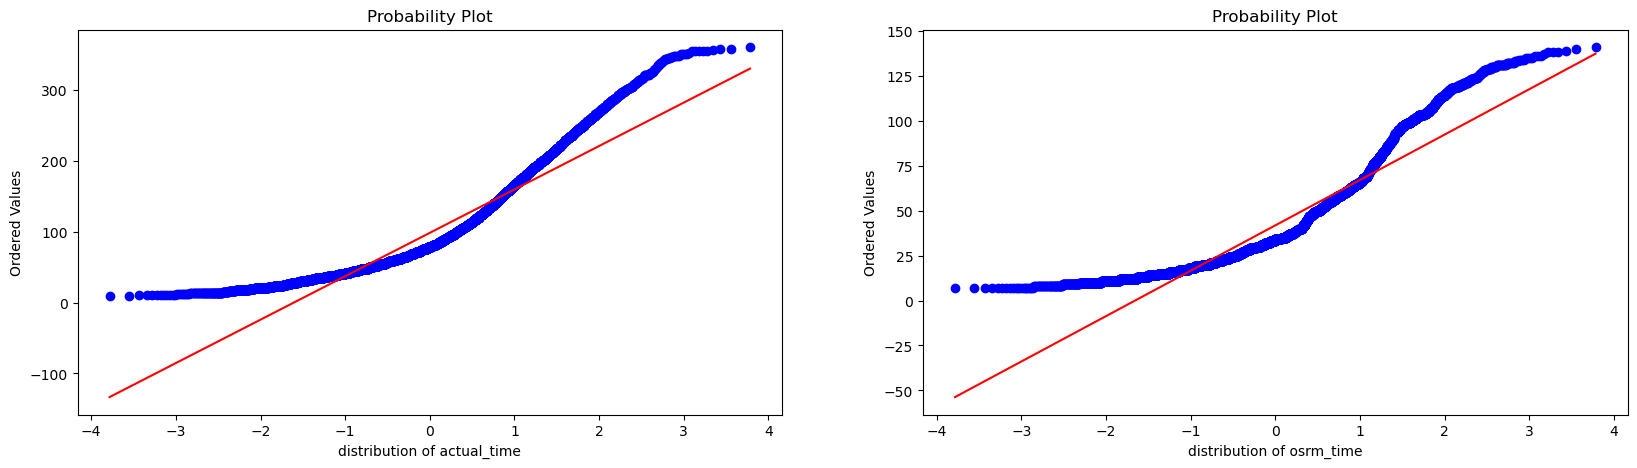

In [61]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(actual_agg,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(osrm_agg,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.show()

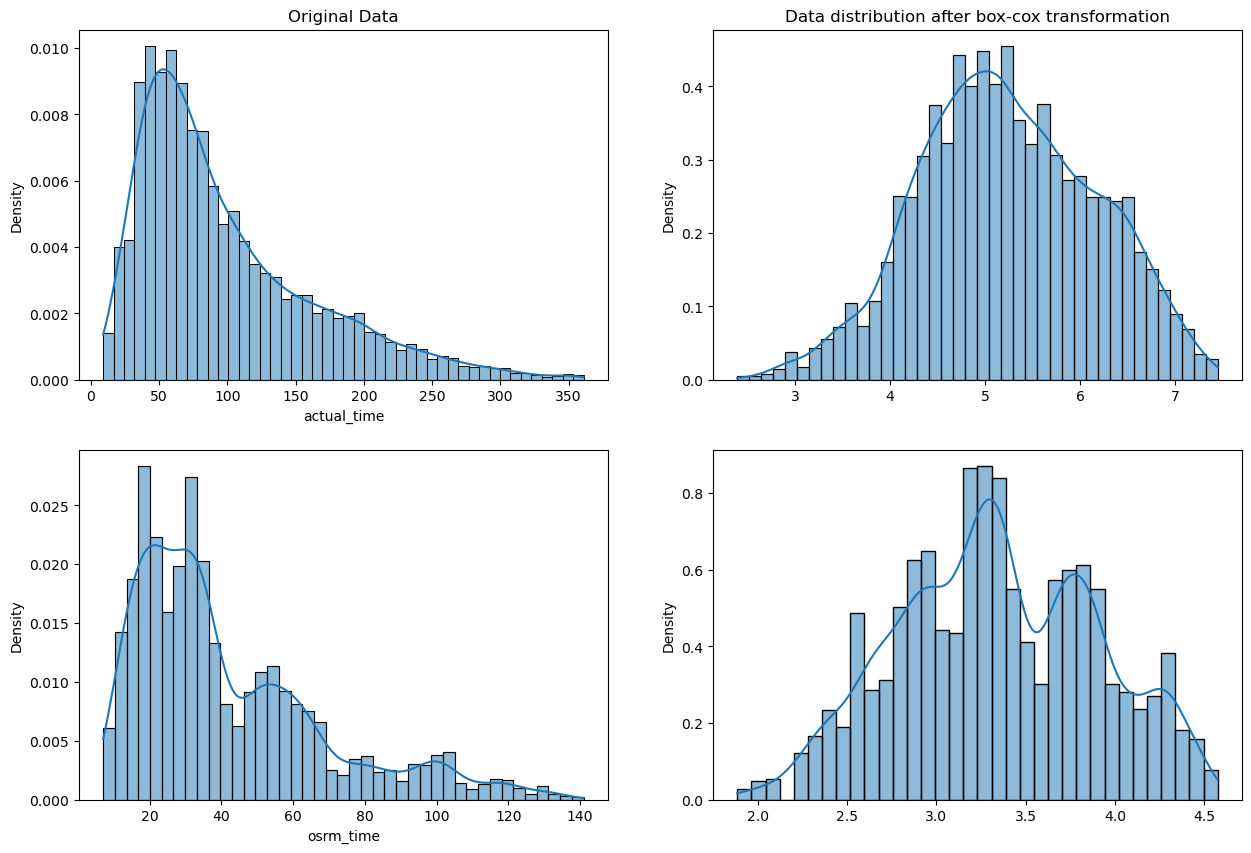

In [62]:
# Transforming data by using boxcox transformation:
original_data1=actual_agg
original_data2=osrm_agg

fitted_data1, fitted_lambda1 = boxcox(actual_agg)
fitted_data2, fitted_lambda2 = boxcox(osrm_agg)

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.title('Original Data')
plt.subplot(2,2, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
plt.title('Data distribution after box-cox transformation')
plt.subplot(2,2, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(2,2, 4)
sns.histplot(fitted_data2, kde=True, stat="density")
plt.show()

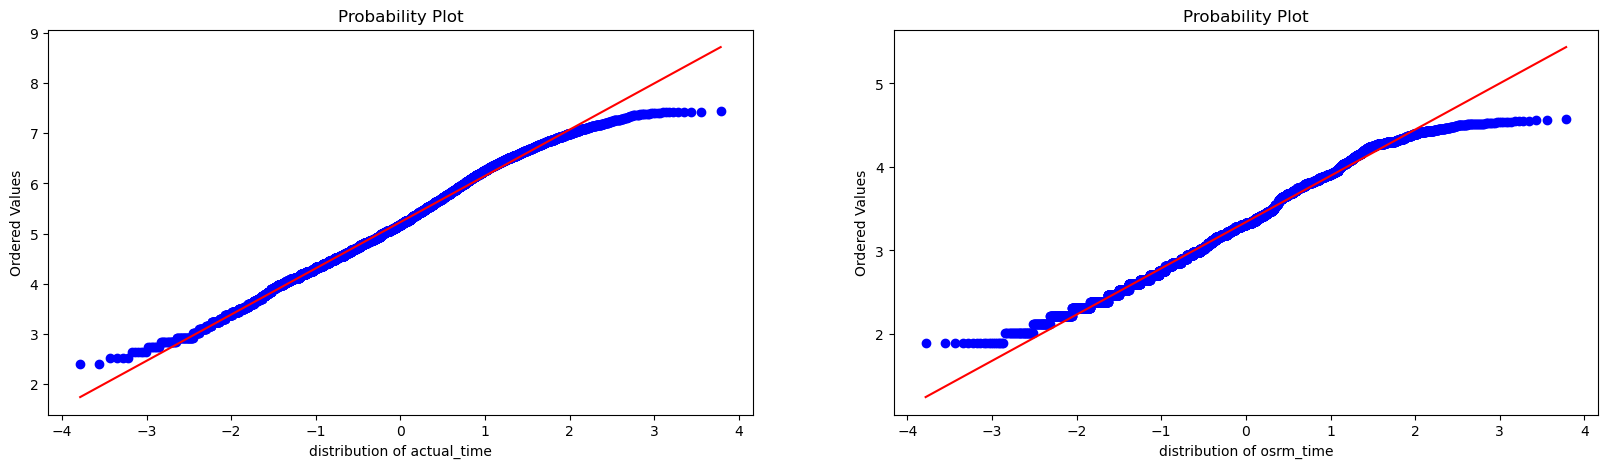

In [63]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.show()

In [64]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(osrm_agg, actual_agg)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.0
Reject Null Hypothesis: Variance of the input datasets is not same


**Observations on the assumption:**
1. with confidence level 0.05 both data sets have statistically different variance.
2. after outlier removal the data is slightly right skewed which is converted to normal using box_cox transformation.

**Hypothesis setup for ttest:**
1. **Null Hypothesis:** mean of both samples are equal.
2. **Alternate:** mean of both samples is different.

In [65]:
print('actual time mean:', actual_agg.mean())
print('osrm time mean:', osrm_agg.mean())

actual time mean: 98.47546833184657
osrm time mean: 41.80619982158787


In [66]:
alpha = 0.05
t_stat,p_value=ttest_ind(actual_agg,osrm_agg)
print("p value:",p_value)
print("t statistics:",t_stat)
if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
else:
    print('Accept Null Hypothesis: The means of the samples are equal')

p value: 0.0
t statistics: 76.26012622156738
Reject Null Hypothesis: The means of the samples are unequal


In [67]:
# correlation tets
print('pearson correlation coefficient:', stats.pearsonr(osrm_agg, actual_agg)[0])


pearson correlation coefficient: 0.7228021360966055


**Observations:**
1. both data have statistically different mean value (p_val = 0) 
2. Null hypothesis Rejected
2. but both the data are very highly correlated (cc = 0.722)

# Test3: Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

In [68]:
actual_agg = df_out['actual_time']
seg_agg = df_out['segment_actual_time']

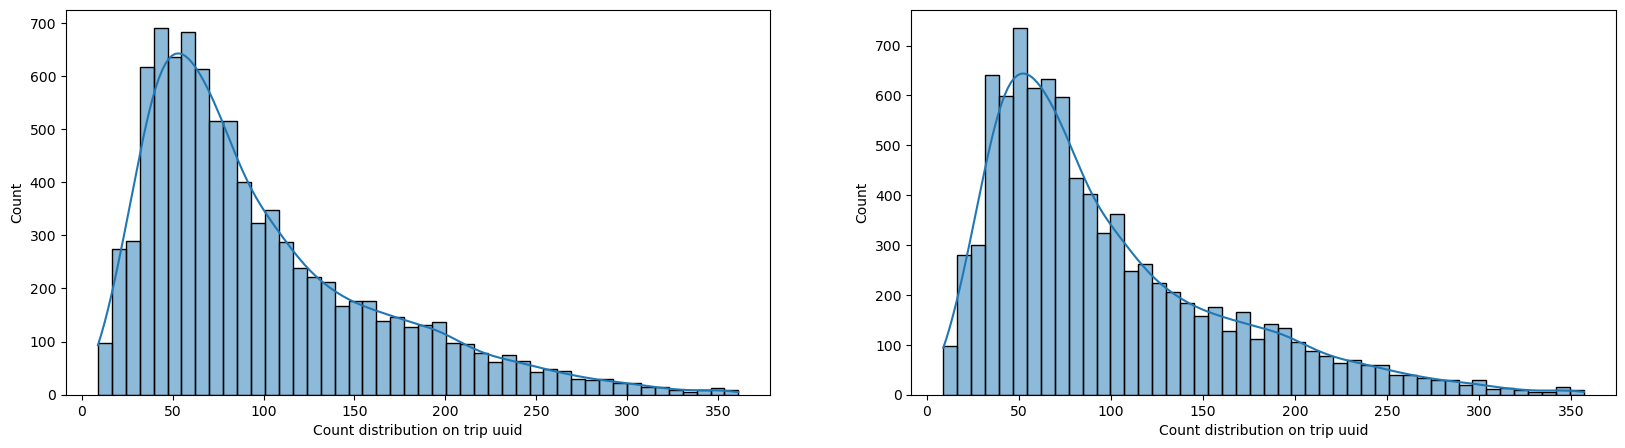

In [69]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(actual_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(seg_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

### **Assumptions under  t-test:**

* Observations in each sample are normally distributed.
* Observations in each sample have close to same variance

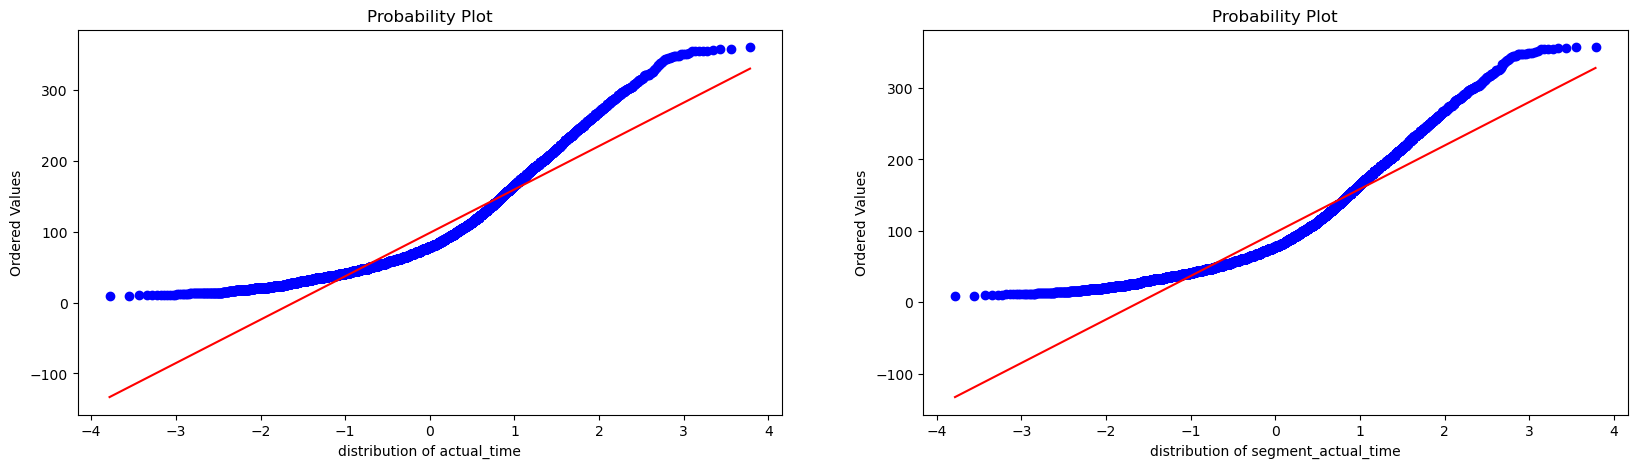

In [70]:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(actual_agg,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(seg_agg,dist="norm",plot=plt)
plt.xlabel('distribution of segment_actual_time',fontsize=10)
plt.show()

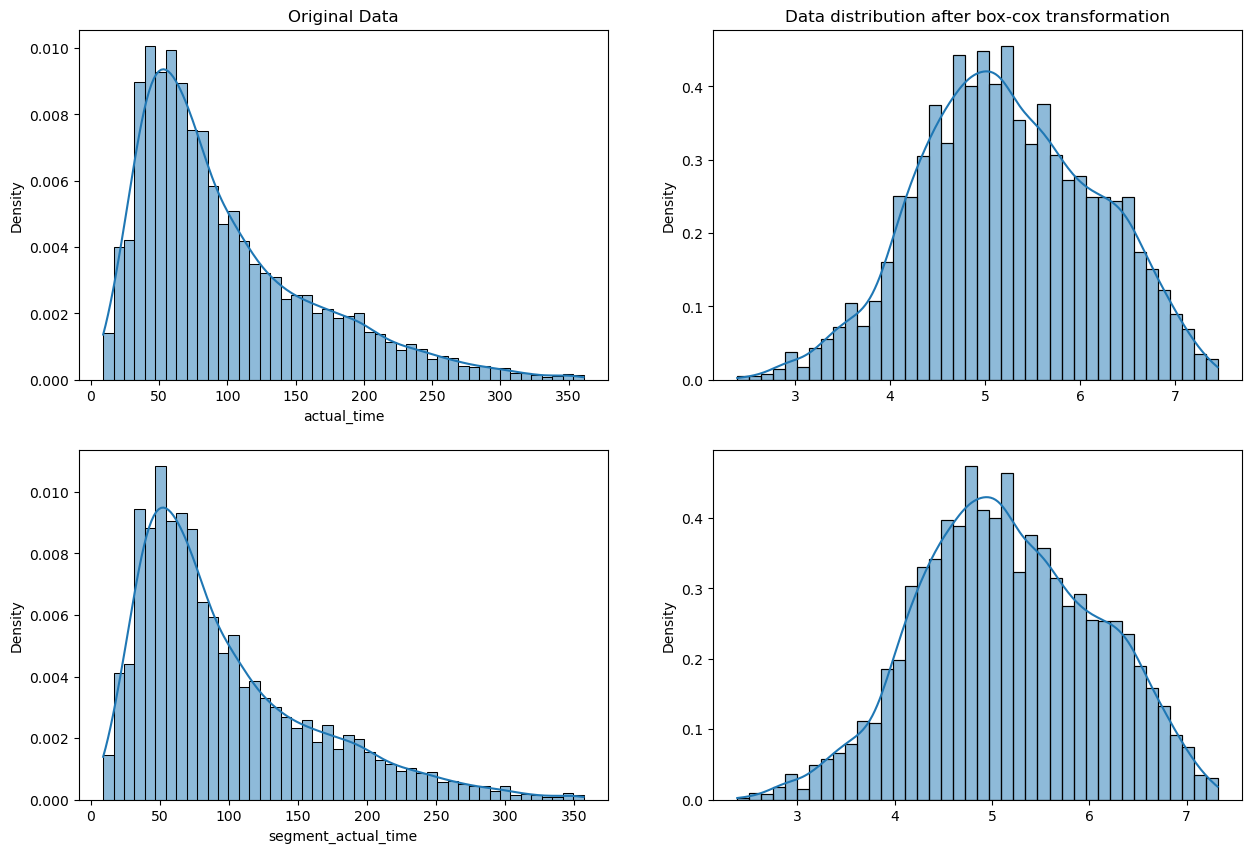

In [71]:
# Transforming data by using boxcox transformation:
original_data1=actual_agg
original_data2=seg_agg

fitted_data1, fitted_lambda1 = boxcox(actual_agg)
fitted_data2, fitted_lambda2 = boxcox(seg_agg)

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.title('Original Data')
plt.subplot(2,2, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
plt.title('Data distribution after box-cox transformation')

plt.subplot(2,2, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(2,2, 4)
sns.histplot(fitted_data2, kde=True, stat="density")

plt.show()

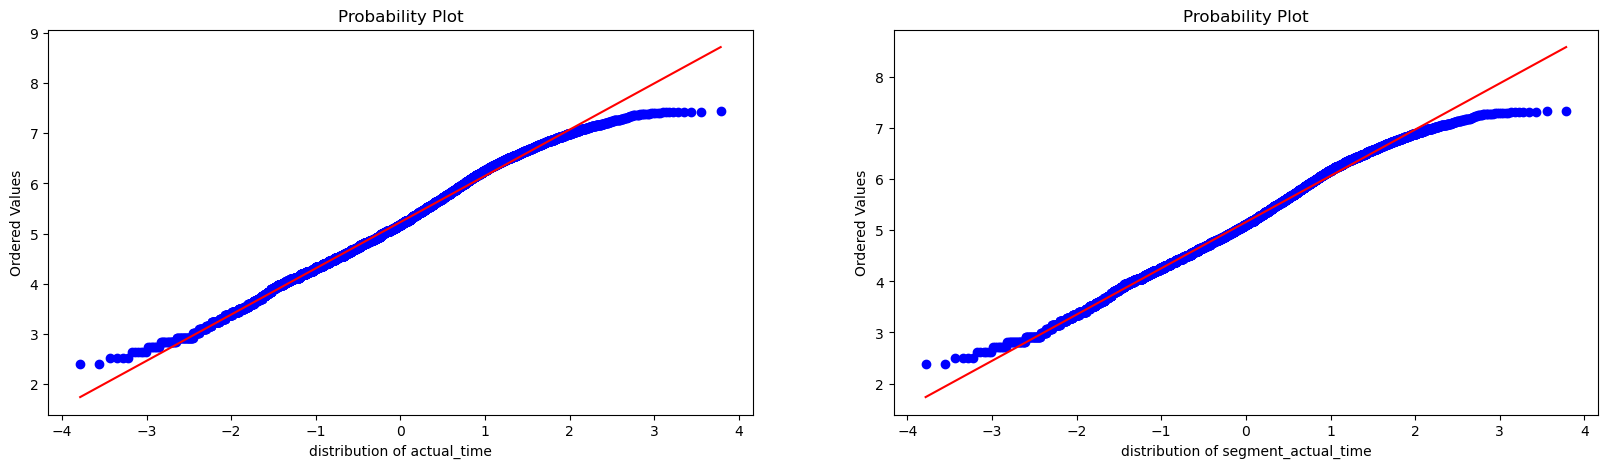

In [72]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of actual_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment_actual_time',fontsize=10)
plt.show()

In [73]:
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(actual_agg, seg_agg)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 0.5791411251061716
Accept Null Hypothesis: Variance of the input datasets is Same/Close


**Hypothesis setup for ttest:**
1. **Null Hypothesis:** mean of both samples are equal.
2. **Alternate:** mean of both samples is different.

In [74]:
print('Actual time mean:', actual_agg.mean())
print('segment time mean:', seg_agg.mean())

Actual time mean: 98.47546833184657
segment time mean: 97.4528322925959


In [75]:
alpha = 0.05
t_stat,p_value=ttest_ind(actual_agg,seg_agg)
print("p value:",p_value)
print("t statistics:",t_stat)
if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
else:
    print('Accept Null Hypothesis: The means of the samples are equal')

p value: 0.29068292756540426
t statistics: 1.0566558214779944
Accept Null Hypothesis: The means of the samples are equal


In [76]:
print('pearson correlation coefficient:', stats.pearsonr(actual_agg,seg_agg)[0])

pearson correlation coefficient: 0.9998966577410145


**Observations:**
1. The calculated p-value : 0.29, which is greater than the significance level.
3. Null Hypothesis is accepted.
4. The means of the actual time and segment actual times are equal

# Test4 : Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [77]:
osrm_dist_agg = df_out['osrm_distance']
seg_osrm_dist_agg = df_out['segment_osrm_distance']

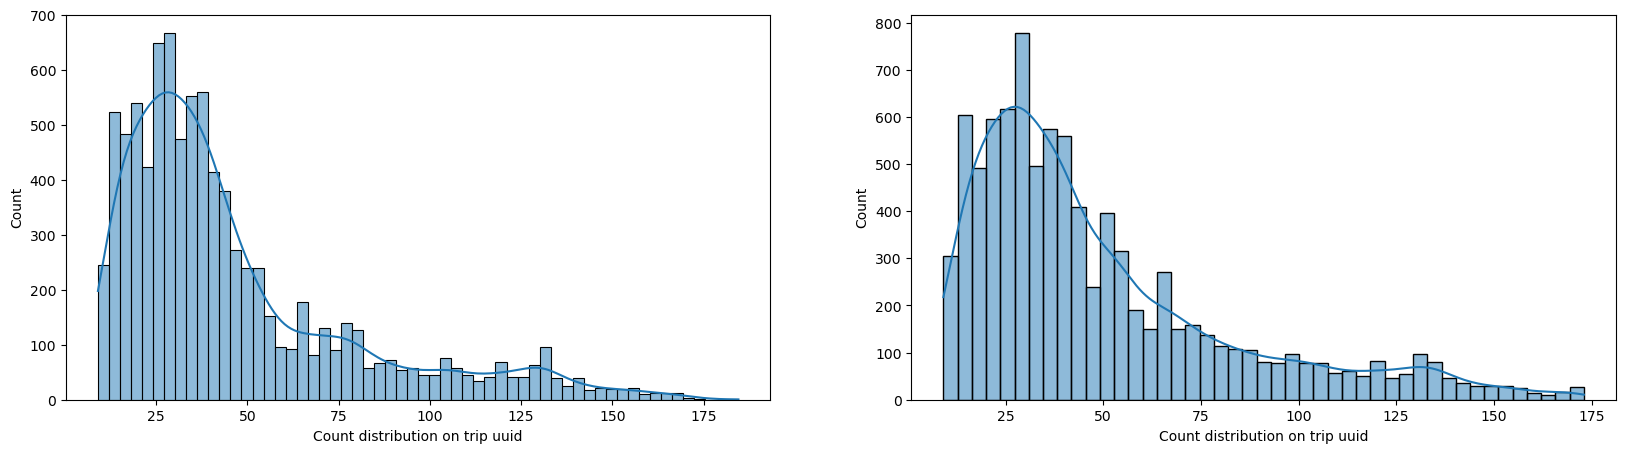

In [78]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(osrm_dist_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(seg_osrm_dist_agg,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

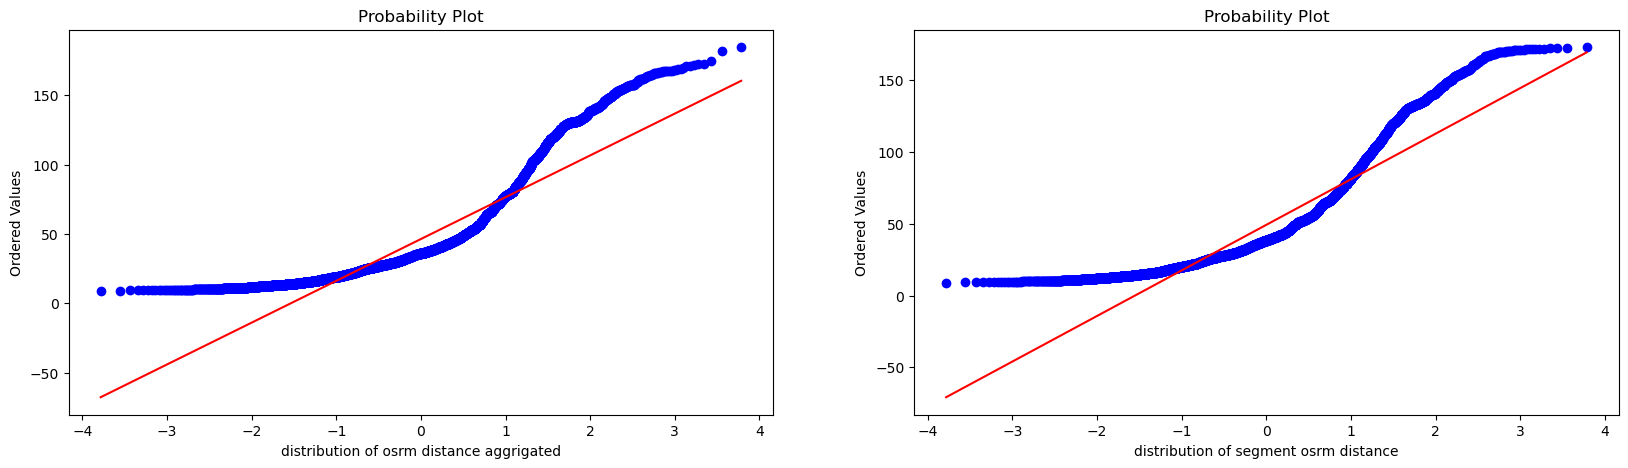

In [79]:
# Validation of Assumption 2 by performing Quantile-Quantile Plot Test:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(osrm_dist_agg,dist="norm",plot=plt)
plt.xlabel('distribution of osrm distance aggrigated',fontsize=10)
plt.subplot(1, 2, 2)
probplot(seg_osrm_dist_agg,dist="norm",plot=plt)
plt.xlabel('distribution of segment osrm distance',fontsize=10)
plt.show()

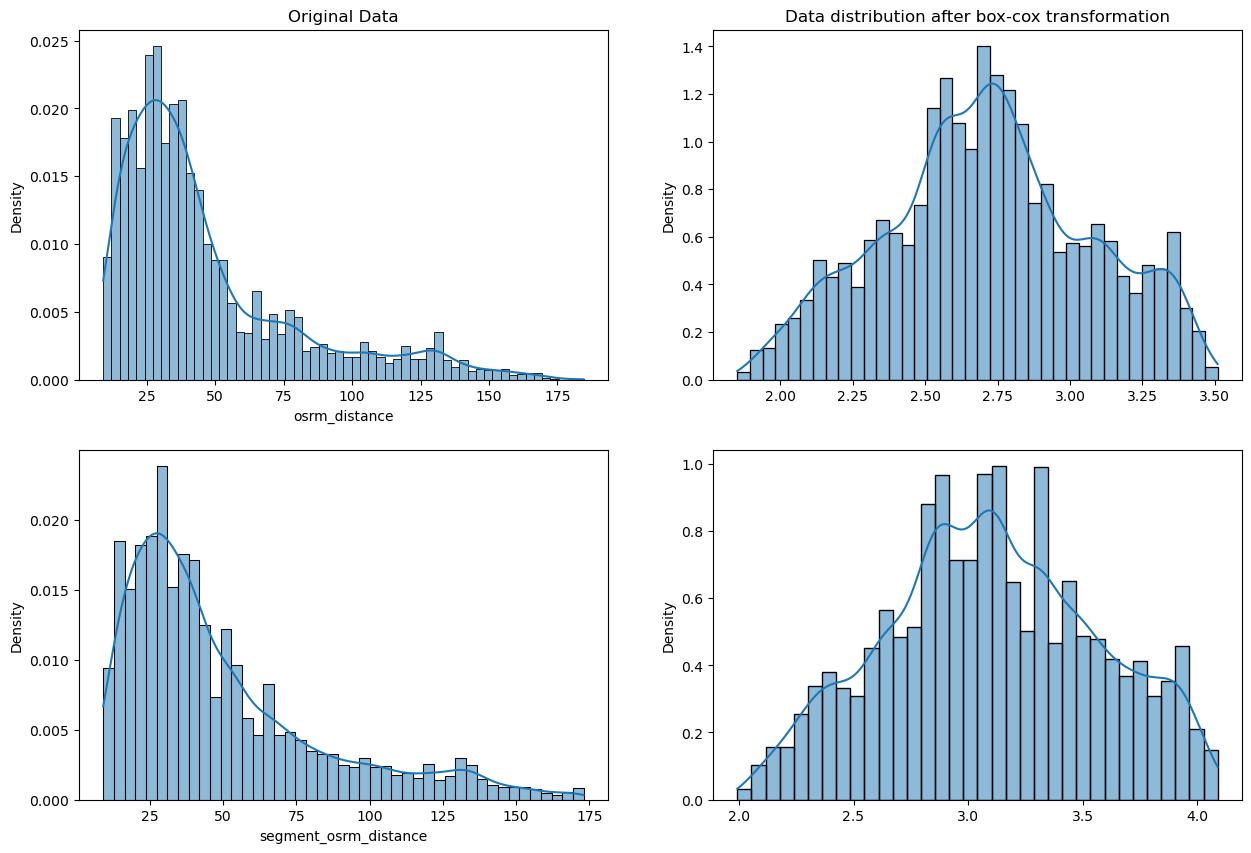

In [80]:
# Transforming data by using boxcox transformation:
original_data1=osrm_dist_agg
original_data2=seg_osrm_dist_agg

fitted_data1, fitted_lambda1 = boxcox(osrm_dist_agg)
fitted_data2, fitted_lambda2 = boxcox(seg_osrm_dist_agg)

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.title('Original Data')
plt.subplot(2,2, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
plt.title('Data distribution after box-cox transformation')
plt.subplot(2,2, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(2,2, 4)
sns.histplot(fitted_data2, kde=True, stat="density")

plt.show()

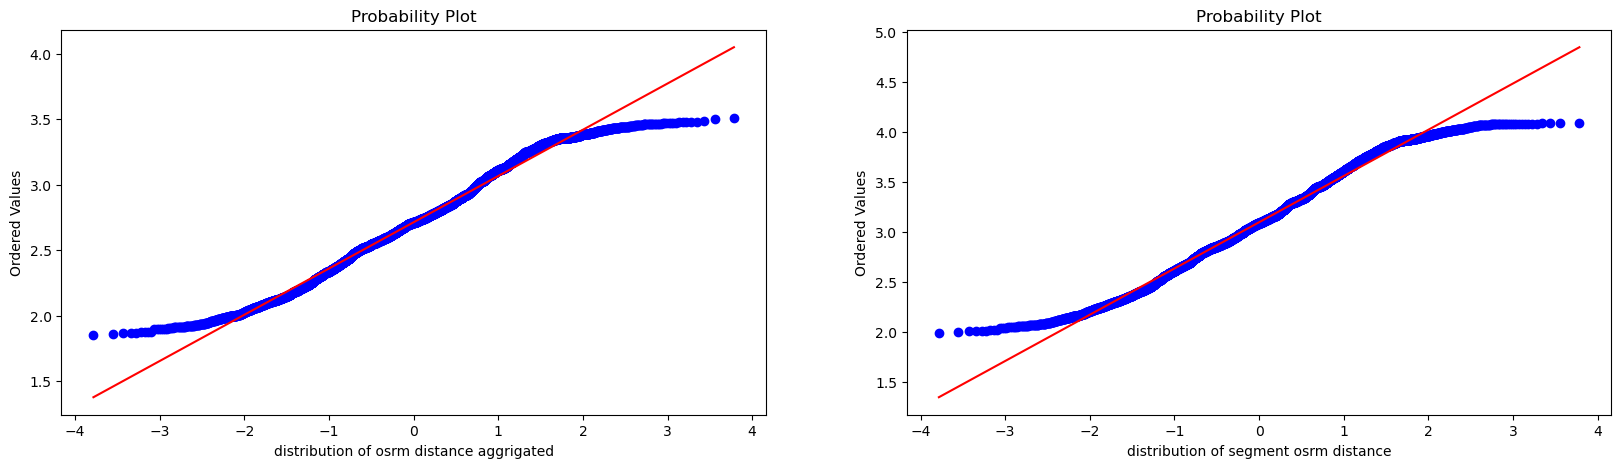

In [81]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of osrm distance aggrigated',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment osrm distance',fontsize=10)
plt.show()

In [82]:
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(osrm_dist_agg, seg_osrm_dist_agg)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 2.48432809181772e-06
Reject Null Hypothesis: Variance of the input datasets is not same


In [83]:
print('osrm_dist_agg Mean:', osrm_dist_agg.mean())
print('seg_osrm_dist_agg Mean:', seg_osrm_dist_agg.mean())

osrm_dist_agg Mean: 46.35217801070486
seg_osrm_dist_agg Mean: 49.291729136931274


In [84]:
alpha = 0.05
t_stat,p_value=ttest_ind(osrm_dist_agg, seg_osrm_dist_agg)
print("p value:",p_value)
print("t statistics:",t_stat)
if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
else:
    print('Accept Null Hypothesis: The means of the samples are equal')

p value: 5.165879005140737e-09
t statistics: -5.844600346414713
Reject Null Hypothesis: The means of the samples are unequal


In [85]:
print('pearson correlation coefficient:', stats.pearsonr(osrm_dist_agg, seg_osrm_dist_agg)[0])

pearson correlation coefficient: 0.9740636014552427


**Observations:**
1. both data have statistically different mean value (p_val = 5.165879005140737e-09)
2. but both the data are very highly correlated (cc = 0.97)

# Test5: Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [86]:
osrm_time = df_out['osrm_time']
seg_osrm_time = df_out['segment_osrm_time']

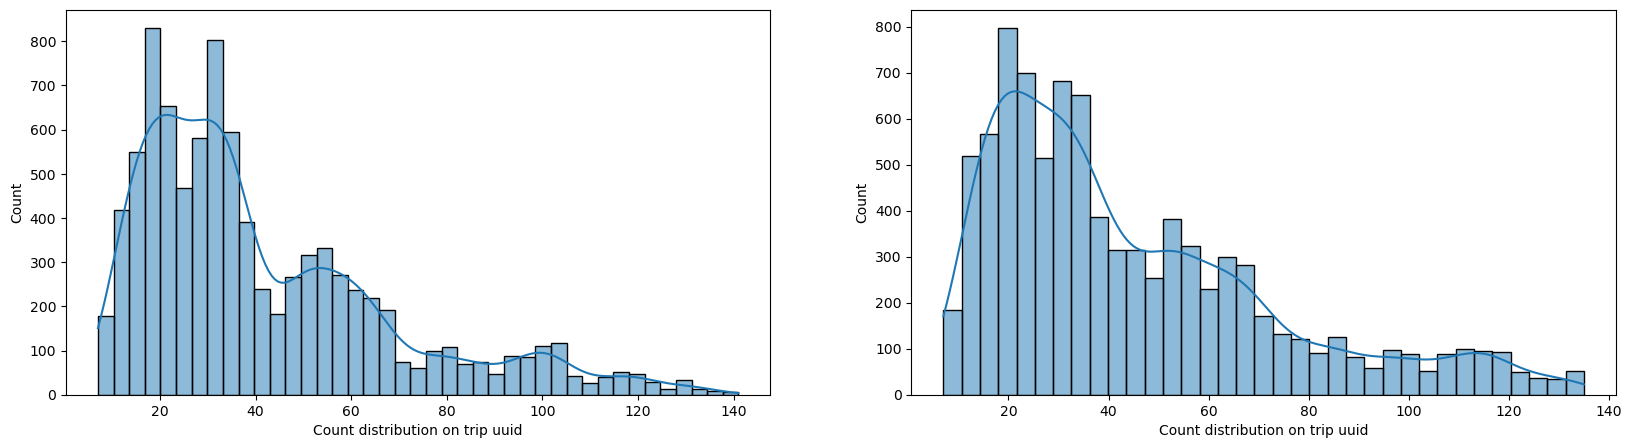

In [87]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(osrm_time,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(seg_osrm_time,kde = True)
plt.xlabel('Count distribution on trip uuid',fontsize=10)
plt.show()

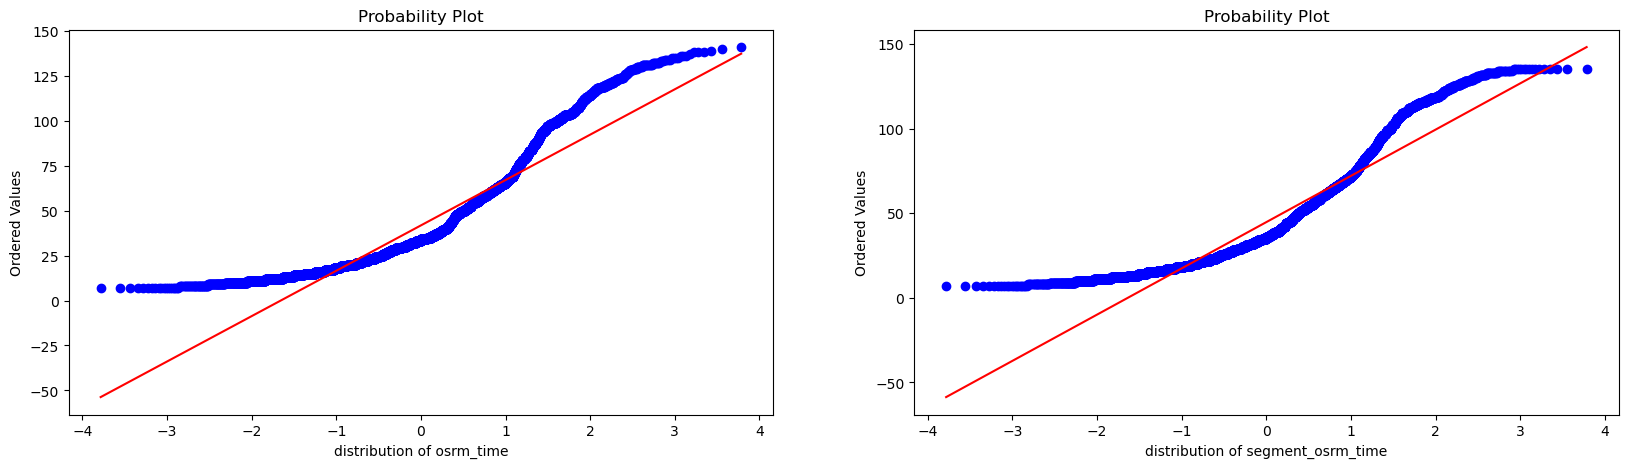

In [88]:
# H0: The sample has a Gaussian distribution.
# H1: The sample does not have a Gaussian distribution.
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(osrm_time,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(seg_osrm_time,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_time',fontsize=10)
plt.show()

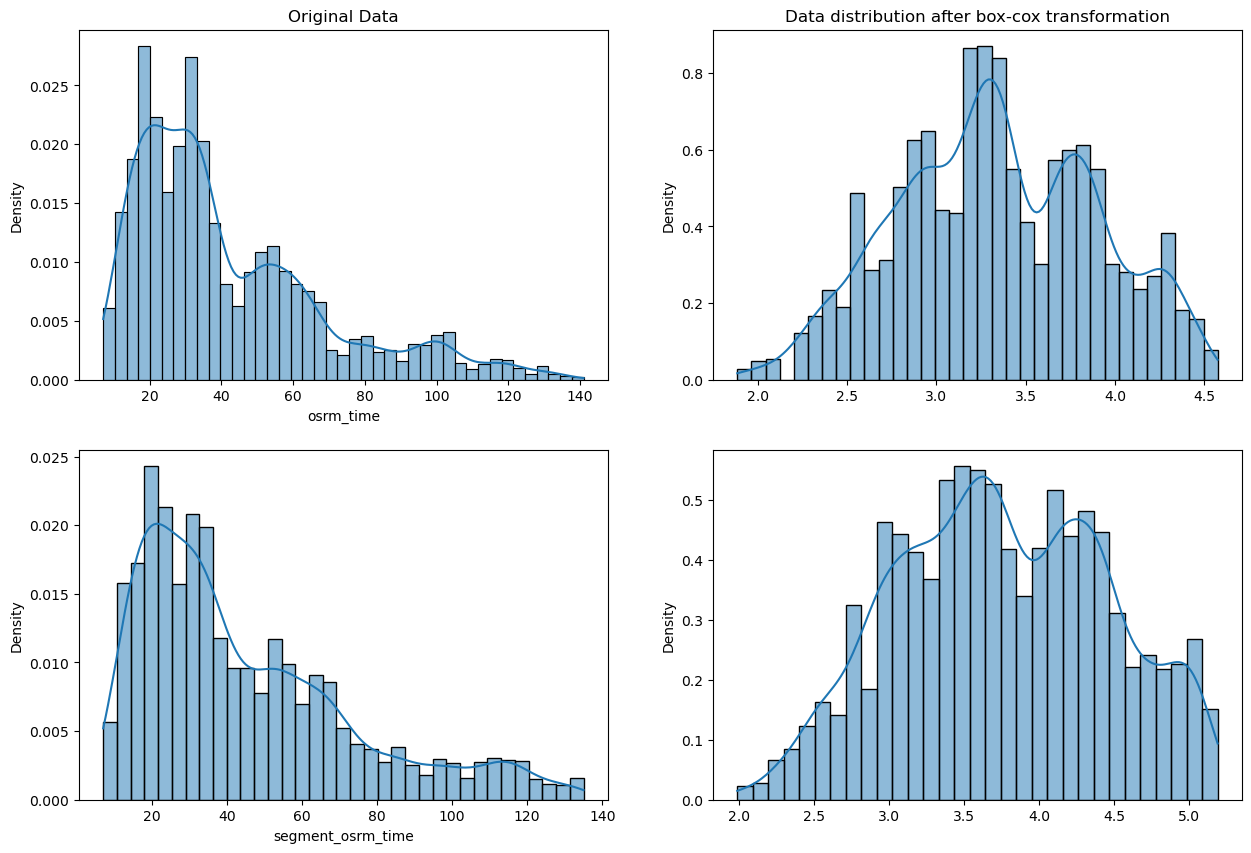

In [89]:
# Transforming data by using boxcox transformation:
original_data1=osrm_time
original_data2=seg_osrm_time

fitted_data1, fitted_lambda1 = boxcox(osrm_time)
fitted_data2, fitted_lambda2 = boxcox(seg_osrm_time)

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2, 1)
sns.histplot(original_data1, kde=True, stat="density")
plt.title('Original Data')
plt.subplot(2,2, 2)
sns.histplot(fitted_data1, kde=True, stat="density")
plt.title('Data distribution after box-cox transformation')

plt.subplot(2,2, 3)
sns.histplot(original_data2, kde=True, stat="density")
plt.subplot(2,2, 4)
sns.histplot(fitted_data2, kde=True, stat="density")

plt.show()

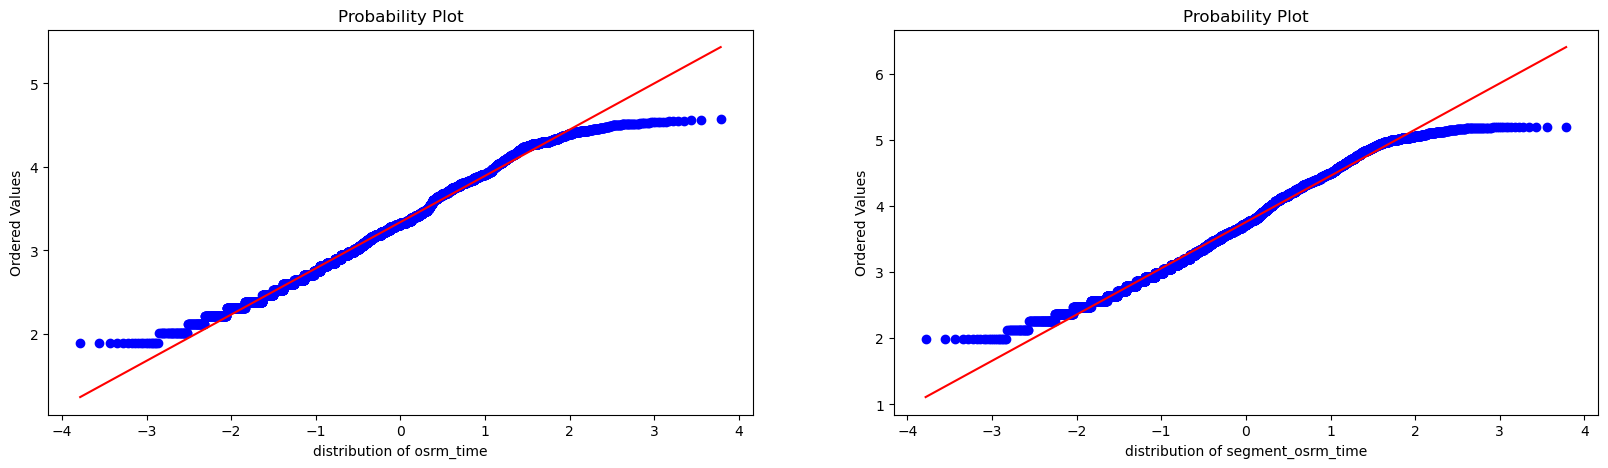

In [90]:
# Quantile-Quantile Plot after data transformation:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
probplot(fitted_data1,dist="norm",plot=plt)
plt.xlabel('distribution of osrm_time',fontsize=10)
plt.subplot(1, 2, 2)
probplot(fitted_data2,dist="norm",plot=plt)
plt.xlabel('distribution of segment_osrm_time',fontsize=10)
plt.show()

In [91]:
#  Validation of Assumption 3: 
# H0:variance of the sample is same.
# Ha:variances of the sample is not same.
alpha=0.05
levene_stat,p_value=levene(osrm_time, seg_osrm_time)
print("alpha:",0.05)
print("p_value:",p_value)
if p_value<alpha:
  print("Reject Null Hypothesis: Variance of the input datasets is not same")
else:
  print('Accept Null Hypothesis: Variance of the input datasets is Same/Close')

alpha: 0.05
p_value: 2.888882960532929e-13
Reject Null Hypothesis: Variance of the input datasets is not same


In [92]:
alpha = 0.05
t_stat,p_value=ttest_ind(osrm_time, seg_osrm_time)
print("p value:",p_value)
print("t statistics:",t_stat)
if p_value<alpha:
    print("Reject Null Hypothesis: The means of the samples are unequal")
else:
    print('Accept Null Hypothesis: The means of the samples are equal')

p value: 2.1479512843092573e-12
t statistics: -7.029458109386468
Reject Null Hypothesis: The means of the samples are unequal


In [93]:
print('pearson correlation coefficient:', stats.pearsonr(osrm_time, seg_osrm_time)[0])

pearson correlation coefficient: 0.9696933987545999


**Observations:**
1. both data have statistically different mean value, null hypothesis rejected
2. but both the data are very highly correlated (cc = 0.96)

# Correlation b/w different data points

<AxesSubplot:>

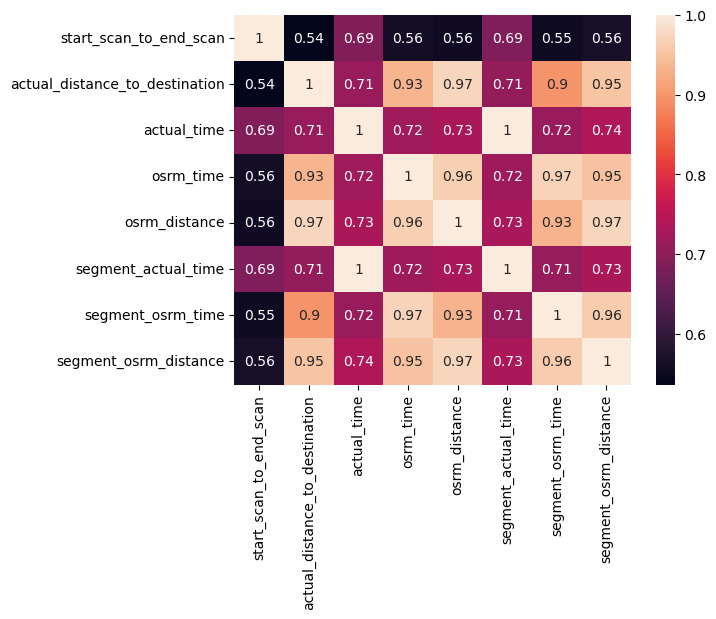

In [94]:
sns.heatmap(df_out[['start_scan_to_end_scan',
                 'actual_distance_to_destination', 
                 'actual_time', 
                 'osrm_time',
                 'osrm_distance', 
                 'segment_actual_time', 
                 'segment_osrm_time',
                 'segment_osrm_distance']].corr(), annot=True)

**observations:**
* mostly numerical data is highly correlated.
* min value of correlation coefficient is around 0.56.
* all the values are positively correlated.

# Handling categorical values

# one-hot encoding of categorical variables

In [95]:
# applying one hot encoding on categorical variables
one_hot_encoded_data = pd.get_dummies(df2, columns = ['data', 'route_type'])
one_hot_encoded_data.iloc[:,-4:]  # last 4 columns showing encoded data

,data_test,data_training,route_type_Carting,route_type_FTL
0,0,1,0,1
1,0,1,1,0
2,0,1,0,1
3,0,1,1,0
4,0,1,0,1
...,...,...,...,...
14812,1,0,1,0
14813,1,0,1,0
14814,1,0,1,0
14815,1,0,1,0


# Column Normalization /Column Standardization

## using StandardScaler

In [96]:
# extracting columns with numerical data to be Standardized
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_distance', 'segment_osrm_time']
std_df = df_out.copy()
std_df1 = df_out.copy()

In [97]:
# standardising using standared scaler
scaler = StandardScaler()
scaler.fit(std_df[numerical_columns])
std_df[numerical_columns] = scaler.transform(std_df[numerical_columns])

In [98]:
std_df[numerical_columns]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
1,-0.105422,1.357511,0.684701,0.974144,1.173938,0.674336,1.016672,0.700037
3,-0.892416,-0.706752,-0.607056,-0.996919,-0.807854,-0.595449,-0.856949,-0.992948
5,-0.016885,-0.433228,-0.576300,-0.699400,-0.553896,-0.579964,-0.618406,-0.751093
6,-0.912091,-1.004340,-1.145289,-1.071298,-1.039911,-1.137431,-1.085881,-1.096600
7,-0.439895,-0.513306,-0.530166,-0.290311,-0.527982,-0.518023,-0.593480,-0.371035
...,...,...,...,...,...,...,...,...
14811,-1.010465,-0.685193,-0.929996,-0.959729,-0.782821,-0.936123,-0.838598,-0.992948
14812,0.652060,0.789051,-0.237983,0.751005,0.821140,-0.239290,0.453407,0.596385
14813,-1.285913,-0.767984,-1.191423,-1.108488,-0.916644,-1.183886,-0.967313,-1.165702
14814,2.265398,0.085965,2.822252,0.230347,0.380164,2.842262,1.619642,1.494704


**Observations:**
* Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

## Using MinMaxScaler

In [99]:
scaler = MinMaxScaler()
scaler.fit(std_df1[numerical_columns])
std_df1[numerical_columns] = scaler.transform(std_df1[numerical_columns])

In [100]:
std_df1[numerical_columns]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
1,0.315895,0.446612,0.380682,0.455224,0.433398,0.379310,0.458126,0.453125
3,0.154930,0.056869,0.142045,0.059701,0.060458,0.143678,0.065890,0.070312
5,0.334004,0.108511,0.147727,0.119403,0.108248,0.146552,0.115829,0.125000
6,0.150905,0.000682,0.042614,0.044776,0.016789,0.043103,0.017964,0.046875
7,0.247485,0.093392,0.156250,0.201493,0.113125,0.158046,0.121047,0.210938
...,...,...,...,...,...,...,...,...
14811,0.130785,0.060939,0.082386,0.067164,0.065169,0.080460,0.069732,0.070312
14812,0.470825,0.339284,0.210227,0.410448,0.367007,0.209770,0.340209,0.429688
14813,0.074447,0.045307,0.034091,0.037313,0.039985,0.034483,0.042786,0.031250
14814,0.800805,0.206538,0.775568,0.305970,0.284023,0.781609,0.584356,0.632812


**Observations:**
* After Normalization of numerical dataset, all values are converted within the new range of 0 and 1.
* It is done by the help of this expression y = (x – min) / (max – min)

# Insights

1. Delhivery provided data of 2 months with 144867 rows and 24 columns.
2. aggregating the data set helped us to look at the data on macro level. 
3. overall it has 14817 unique trip ids out of which 17 are dropped because of null values.
5. Highest order received by Bengalore city.
6. Highest order received by state-wise is Maharashtra.
7. Top 5 source states are Maharashtra, Karnataka, Haryana, Tamil Nadu, and Delhi.
8. Top 5 source cities are Bangalore, Gurgaon ,Mumbai and Bhiwandi. (**To be noted Bengalore have 2 different names in dataset) 
10. Longest Corridor between cities is Guwahati to Bhiwandi having distance of 2140 Km and taking average time around 5457 minutes to delivered order.
11. Based on two sample t-test, there is NO difference between mean of Actual time and segment actual time.
12. The difference of mean between (order start time - order end time) and start scan to end scan is high.
13. There is significant difference between mean of Actual time and osrm time.
15. There is significant difference between mean of osrm distance and segment osrm distance. And mean of segment osrm distance is higher than the osrm distance.
16. Based on two sample t-test, the mean of the osrm time is lesser than segment osrm time.



# Recommendation

1. As the actual time is more than the osrm time, the estimated should be done on the basis of actual time.
2. As the segment osrm distance is more than osrm distance, the segments are considered of higher length.
3. the osrm data is collected from the 3rd party maps or servers, that is why we have higher number of variation in actual and osrm data.
3. optimized selections of the distribution centre can reduce average travel time to the customers.
4. All products picked up at the same source city and destined to the same destination city must be shipped with FTL (full truck load).
5. all same citi orders can be shipped using carting method.
6. Distribution centers and check points must be linked with advanced information systems to ensure that all pickups and deliveries are made within the schedule time.